### Student Information
Name:林守凡 Shou-Fan Lin

Student ID:114062604

GitHub ID:linshoufan

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/linshoufan/Documents/清大/資料探勘與應用/hw1/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (main, Sep 21 2025, 19:05:57) [Clang 15.0.0 (clang-1500.3.9.4)]


## 1.Data preparation

In [4]:
#categories
categories = ['StockMarket',
              'stocks',
              'stockstobuytoday',
              'wallstreetbets']

In [5]:
# only need subreddit, text, label field
DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"
df = pd.read_csv(DATA_PATH)
df = df[['subreddit', 'text', 'label']]
df = df.rename(columns={'subreddit': 'category_name', 'text': 'text', 'label': 'label'})

# turn into list
text = df['text'].tolist()
category_name = df['category_name'].tolist()
label = df['label'].tolist()

# use dict to store the data
reddit_dataset = {
    "text": text,
    "label": label,
    "category_name": category_name
}

In [6]:
reddit_dataset["text"][0:3]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.',
 'Seeing lots of red in the ticker.']

In [7]:
reddit_dataset["category_name"][0:3]

['wallstreetbets', 'wallstreetbets', 'StockMarket']

In [8]:
reddit_dataset["label"][0:3]

[-1.0, 0.0, 0.0]

In [9]:
len(reddit_dataset["text"])

847

In [10]:
len(reddit_dataset["category_name"])

847

In [11]:
len(reddit_dataset["label"])

847

#### print an example from the dataset

In [12]:
print("\n".join(reddit_dataset["text"][0].split("\n")))
# there is no EOL in text

Calls on retards


### exercise 1
print out the text data for the first three samples in the dataset

In [13]:
for i in range(3):
    print(f"example {i + 1}")
    print("\n".join(reddit_dataset["text"][i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


## 2.Data Transformation

### 2.1 Converting Dictionary into Pandas Dataframe

In [14]:
import pandas as pd

X = pd.DataFrame({
    "text": [" ".join(t.split("\n")).strip('\n\t') for t in reddit_dataset["text"]],
    "label": reddit_dataset["label"],
    "category_name": reddit_dataset["category_name"]
})

print(X.head())

                                                text  label     category_name
0                                   Calls on retards   -1.0    wallstreetbets
1  Stunt as in like why did they even make a big ...    0.0    wallstreetbets
2                  Seeing lots of red in the ticker.    0.0       StockMarket
3  Vision Marine Technologies Inc. is rewriting t...    1.0  stockstobuytoday
4                           He didn’t say thank you.   -1.0       StockMarket


In [15]:
len(X)

847

In [16]:
X.text[0:2]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
Name: text, dtype: object

In [17]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


### 2.2 Some query with the data

In [18]:
# first 10
X[:10][["text","category_name"]]

text     category_name
0                                   Calls on retards    wallstreetbets
1  Stunt as in like why did they even make a big ...    wallstreetbets
2                  Seeing lots of red in the ticker.       StockMarket
3  Vision Marine Technologies Inc. is rewriting t...  stockstobuytoday
4                           He didn’t say thank you.       StockMarket
5  Hoping to ejaculate in wet warm puss tonight, ...    wallstreetbets
6  Trump will respond to china increasing their t...            stocks
7  Confirmed not a trap. Its been like this for p...    wallstreetbets
8  Am I the only one seeing the cup & handle brea...            stocks
9  HLGN is $10. Hurry and catch it now before it ...  stockstobuytoday

In [19]:
# last 10
X[-10:]

text  label  \
837                   Finance media lying   *Surprise*   -1.0   
838                                        I am all in    0.0   
839                               The Art of the Deal…    0.0   
840                                             Lol fr    0.0   
841  So countries “begging to stop the tariffs” and...    1.0   
842        Invest now it is going to shoot up tomorrow    1.0   
843                             Where can I read this?    0.0   
844  Upgrades, Downgrades   [Stock Analyst Recommen...    0.0   
845  i sold my puts so i expect cheeto to declare w...   -1.0   
846                       ![img](emote|t5_2th52|31224)    0.0   

        category_name  
837            stocks  
838  stockstobuytoday  
839       StockMarket  
840       StockMarket  
841       StockMarket  
842  stockstobuytoday  
843       StockMarket  
844  stockstobuytoday  
845    wallstreetbets  
846    wallstreetbets

### exercise 2
more querying techniques

In [20]:
print("exercise 2-1\n")
print(X.loc[10:19, ['text', 'category_name']]) # rows 10 to 19 and specified columns

print("\nexercise 2-2\n")
print(X.iloc[30:35, :]) # rows 30 to 34 and all columns

print("\nexercise 2-3\n")
print(X.loc[40]) # row 40 and all columns

print("\nexercise 2-4\n")
print(X.iloc[120, 1:3]) # row 120 and columns 1 to 2

print("\nexercise 2-5\n")
print(X.sample(3)["category_name"]) # random sample of 3 category names


exercise 2-1

                                                 text   category_name
10       It's a copy/paste from a Bloomberg terminal.          stocks
11  this sub has ruined emails for me, whenever I ...  wallstreetbets
12  Honestly let the economy burn, maybe people wi...          stocks
13   I’ve been doing pretty good with this, but it...          stocks
14                     USA begging China to call them          stocks
15                                 Disgusting tactics          stocks
16                                       Jesus Christ          stocks
17  Exactly this. Trump will blink first because, ...          stocks
18                                     Trump and dump     StockMarket
19  I think we are past the numbers. Just assume f...          stocks

exercise 2-2

                                                 text  label     category_name
30  > Still seems like an awful investment  That s...   -1.0            stocks
31  $EVGO   *Record Revenue increasing 5 st

### exercise 3 
fetch records belonging to the StockMarket category, and query every 10th record. Only show the first 5 records.

In [21]:
X[X["category_name"] == "StockMarket"][::10][0:5]

text  label category_name
2                    Seeing lots of red in the ticker.    0.0   StockMarket
62                                     Comedy gold :))   -1.0   StockMarket
94             I can’t take four years of lying. Help!    0.0   StockMarket
113   An evil man will burn his own nation to the g...    0.0   StockMarket
146  He reached this level only because of his inhe...   -1.0   StockMarket

## 3.Data Mining using Pandas

### Missing Values

In [22]:
# check missing values
X.isnull()

text  label  category_name
0    False  False          False
1    False  False          False
2    False  False          False
3    False  False          False
4    False  False          False
..     ...    ...            ...
842  False  False          False
843  False  False          False
844  False  False          False
845  False  False          False
846  False  False          False

[847 rows x 3 columns]

In [23]:
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

### exercise 4
try to calculate the missing values in every record instead of every column.  

In [24]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

### exercise 5
#### skip this exercise in this file

## 4.Data Preprocessing

### 4.1 sampling

In [25]:
X_sample = X.sample(n=500, random_state = 42) # random seed

In [26]:
len(X_sample)

500

In [27]:
X_sample[0:4]

text  label   category_name
457                                          "We" who?    0.0     StockMarket
342                                     Chicken jockey    0.0  wallstreetbets
280                                      Not great Bob   -1.0     StockMarket
275  Speak for yourself, my wife is being harder on...    0.0  wallstreetbets

### exercise 6
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [28]:
# exercise 6-1: compare the category distribution of X and X_sample

# compute counts and percentages for the full dataset first
full_counts = X['category_name'].value_counts()
full_percent = (X['category_name'].value_counts(normalize=True) * 100).round(2)

full_df = pd.DataFrame({
    'count': full_counts,
    'percentage': full_percent
}).reset_index().rename(columns={'index': 'category_name'})
print("Full dataset category distribution:\n", full_df)

# then compute counts and percentages for the sampled dataset
sample_counts = X_sample['category_name'].value_counts()
sample_percent = (X_sample['category_name'].value_counts(normalize=True) * 100).round(2)
sample_df = pd.DataFrame({
    'count': sample_counts,
    'percentage': sample_percent
}).reset_index().rename(columns={'index': 'category_name'})

print("\nSample subset category distribution:\n", sample_df)

"""
the changes in count and percentage are evident
because sampling is random, distribution are slightly different
and not exactly the same as original dataset
"""

# exercise 6-2: compare the index values

# index of full dataset are continuous, start from 0
print("\nFull dataset index range:", X.index[:10].tolist())
# index of sampled dataset are not continuous and look random
print("Sample subset index example (first 10 rows):", X_sample.index[:10].tolist())

Full dataset category distribution:
       category_name  count  percentage
0            stocks    274       32.35
1       StockMarket    250       29.52
2  stockstobuytoday    174       20.54
3    wallstreetbets    149       17.59

Sample subset category distribution:
       category_name  count  percentage
0            stocks    155        31.0
1       StockMarket    138        27.6
2  stockstobuytoday    115        23.0
3    wallstreetbets     92        18.4

Full dataset index range: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Sample subset index example (first 10 rows): [457, 342, 280, 275, 843, 734, 96, 662, 109, 655]


#### use matplotlib python library to generate some visualizations

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
categories

['StockMarket', 'stocks', 'stockstobuytoday', 'wallstreetbets']

category_name
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

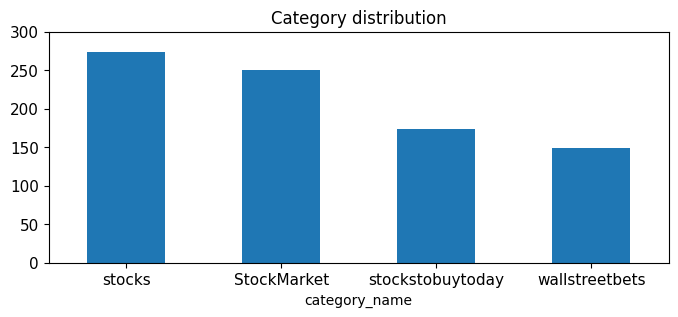

In [31]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
stocks              155
StockMarket         138
stockstobuytoday    115
wallstreetbets       92
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

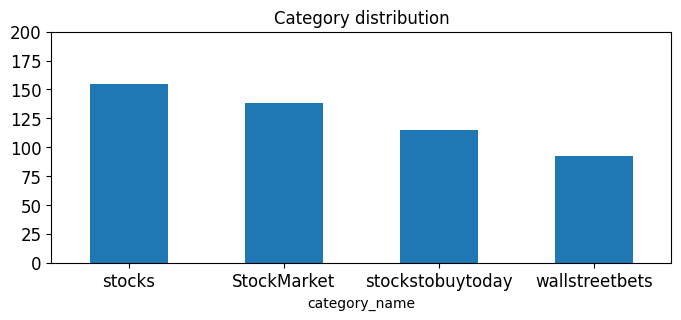

In [32]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 200], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### exercise 7
do not hardcoded the maximum value for y

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

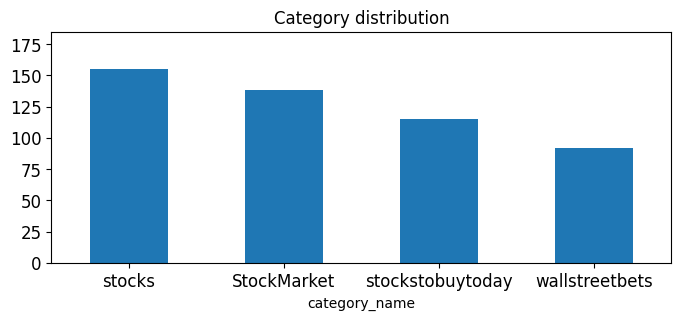

In [33]:
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max() + 30], 
                                           rot = 0, fontsize = 12, figsize = (8, 3))

### exercise 8
do a side-by-side comparison of the distribution between the two datasets

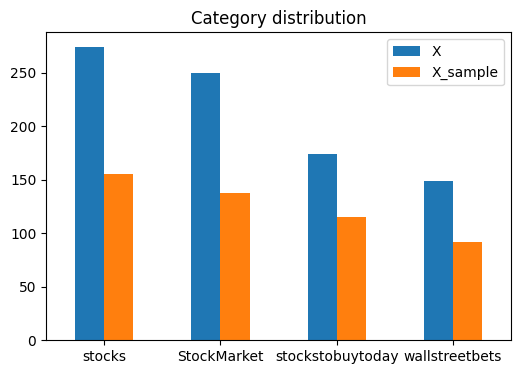

In [34]:
combined = X['category_name'].value_counts().rename("X").to_frame().join(
    X_sample['category_name'].value_counts().rename("X_sample").to_frame()
)

combined = combined.sort_values(by = "X", ascending = False)
combined.index.name = None

combined.plot(kind = 'bar', figsize = (6, 4))
plt.title('Category distribution')
plt.xticks(rotation = 0)
plt.legend(loc = 'upper right')
plt.show()

### 4.2 Feature Creation

In [35]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/linshoufan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [36]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [37]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [38]:
X[0:4]

text  label     category_name  \
0                                   Calls on retards   -1.0    wallstreetbets   
1  Stunt as in like why did they even make a big ...    0.0    wallstreetbets   
2                  Seeing lots of red in the ticker.    0.0       StockMarket   
3  Vision Marine Technologies Inc. is rewriting t...    1.0  stockstobuytoday   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...

In [39]:
list(X[0:2]['unigrams'])

[['Calls', 'on', 'retards'],
 ['Stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'No',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

### 4.3 Feature subset selection
generate a document-term matrix from the original dataset

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[1])

  (np.int32(0), np.int32(3696))	1
  (np.int32(0), np.int32(388))	1
  (np.int32(0), np.int32(2024))	2
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(4244))	1
  (np.int32(0), np.int32(1168))	1
  (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(1409))	1
  (np.int32(0), np.int32(2402))	1
  (np.int32(0), np.int32(538))	1
  (np.int32(0), np.int32(1083))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3628))	1
  (np.int32(0), np.int32(2161))	1
  (np.int32(0), np.int32(3848))	1
  (np.int32(0), np.int32(1568))	1
  (np.int32(0), np.int32(2878))	1
  (np.int32(0), np.int32(2645))	1
  (np.int32(0), np.int32(887))	1
  (np.int32(0), np.int32(3477))	1
  (np.int32(0), np.int32(1412))	2
  (np.int32(0), np.int32(3795))	1
  (np.int32(0), np.int32(2918))	1


In [41]:
count_vect.get_feature_names_out()[887]

'company'

In [42]:
count_vect.get_feature_names_out()[22]

'125'

In [43]:
count_vect.get_feature_names_out()[696]

'camps'

In [44]:
count_vect.get_feature_names_out()[17]

'11'

In [45]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### exercise 9
analyze the first record of our X dataframe with the new analyzer we have just built

In [46]:
analyze(X.text[0])

['calls', 'on', 'retards']

In [47]:
# We can check the shape of this matrix by:
X_counts.shape

(847, 4346)

In [48]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [50]:
# we convert from sparse array to normal array
X_counts[0:10, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [49]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### exercise 10
too sparse to find more non-zero, I would only like to look at the first non-zero of the 4th record

In [50]:
# Answer here
row = X_counts[3]
indices = row.nonzero()[1]  # non-zero column indices of the 4th record
sorted_indices = sorted(indices)

count_vect.get_feature_names_out()[sorted_indices[0]]

'116'

the number `3` in the 4th record is indeed located at index 18

In [51]:
print("indices: ", sorted_indices[0])

indices:  18


---

look at this nice little heat map of our term-document matrix

In [52]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [53]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [54]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

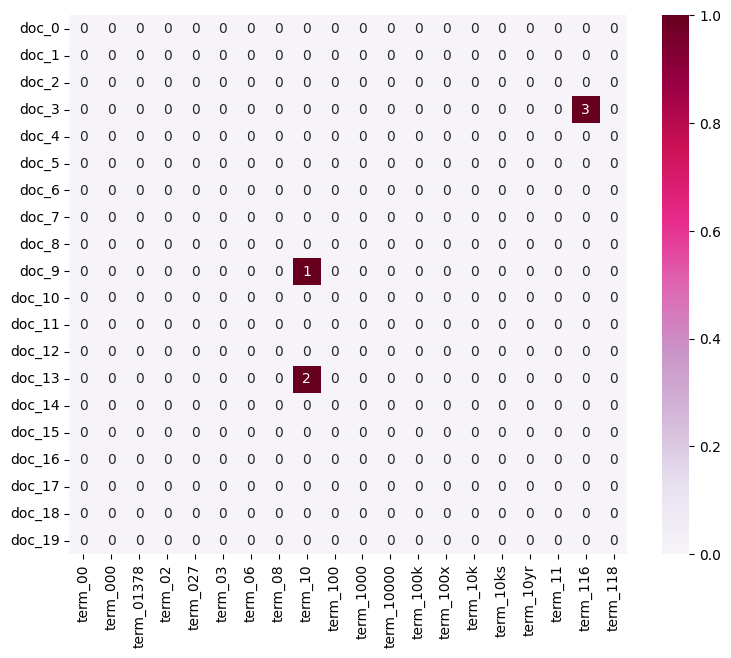

In [55]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### exercise 11
Try to modify the code above to plot the entire term-document matrix or just a sample of it, do this efficiently and get more non-zero.

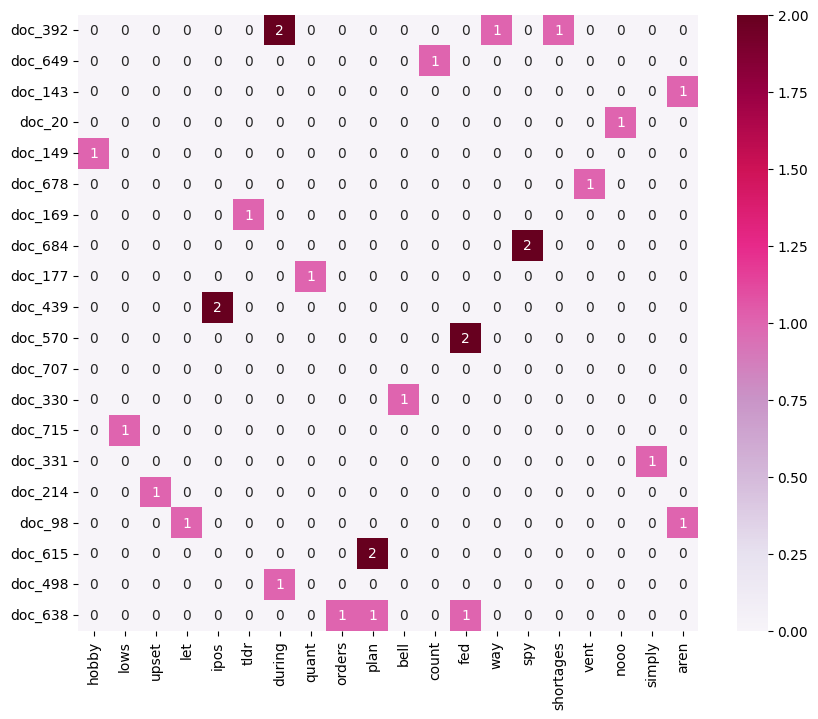

In [56]:
n_docs = 20
n_terms = 20

# randomly select terms
all_terms = np.arange(X_counts.shape[1])
terms_idx = np.random.choice(all_terms, n_terms, replace=False)

# ensure each term has at least one non-zero document
# so it can show more non-zero
docs_set = set()
for term in terms_idx:
    docs_with_term = X_counts[:, term].nonzero()[0]
    if len(docs_with_term) > 0:
        docs_set.add(np.random.choice(docs_with_term))

# if not enough documents, randomly select more
all_docs = np.arange(X_counts.shape[0])
while len(docs_set) < n_docs:
    docs_set.add(np.random.choice(all_docs))

docs_idx = list(docs_set)[:n_docs]

# build sub-matrix
plot_matrix = X_counts[docs_idx][:, terms_idx].toarray()
plot_x = count_vect.get_feature_names_out()[terms_idx]
plot_y = [f"doc_{d}" for d in docs_idx]

# draw
df_plot = pd.DataFrame(plot_matrix, columns = plot_x, index = plot_y)
plt.figure(figsize = (10, 8))
ax = sns.heatmap(df_plot,
                cmap = "PuRd",
                vmin = 0,
                vmax = df_plot.values.max(),
                annot = True, fmt = "d"
)


### 4.4 Attribute Transformation / Aggregation

####  4.4.1 Transform Text Data

In [57]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [58]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [59]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


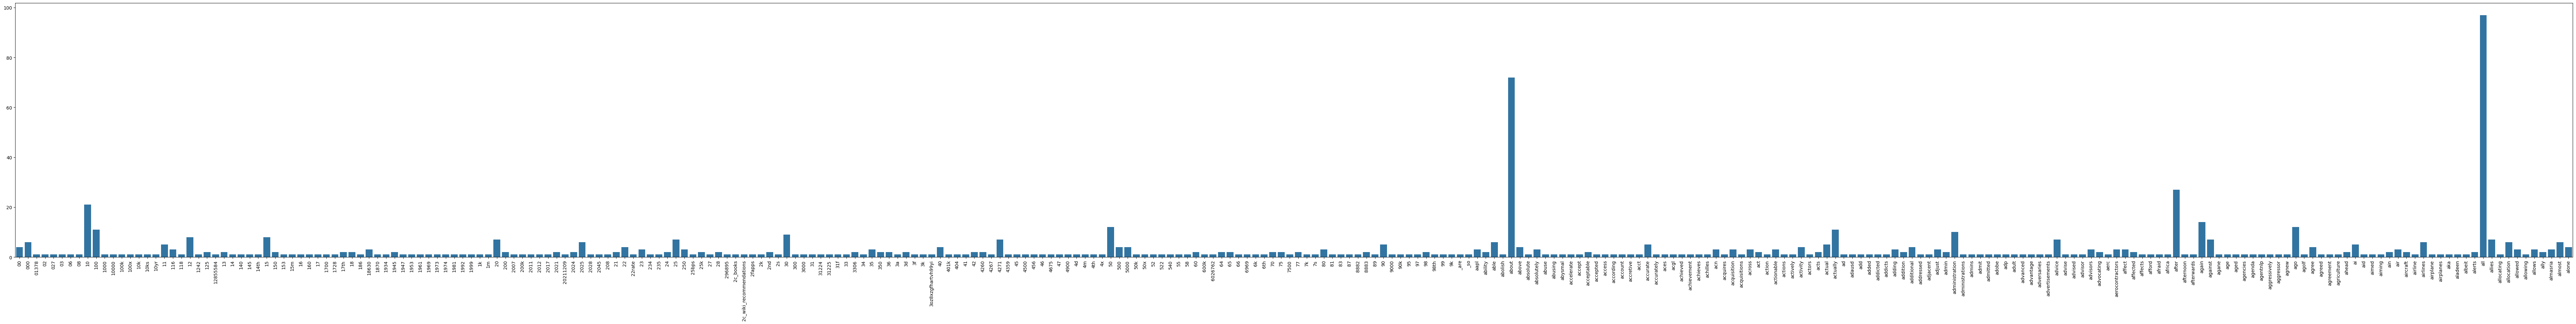

In [60]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### exercise 12
nicer interactive visualization

In [61]:
import plotly.express as px

# reference: https://plotly.com/python/plotly-express/
# first 300 terms and frequencies
term = count_vect.get_feature_names_out()[:300]

# plotly bar chart
fig = px.bar(x = term,
            y = term_frequencies[:300], 
            labels = {'x':'Term', 'y':'Frequency'}, 
            title = 'Term Frequency (first 300 terms)'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = term, # values on x-axis
    ticktext = term, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

### exercise 13
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. The below efficiently reduce the number of terms to visualize


In [62]:
terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# get threshold for top 3%
threshold = np.percentile(freqs, 97)

# select terms above threshold
indices = np.where(freqs >= threshold)[0]
top_terms = terms[indices]
top_freqs = freqs[indices]

# plot bar chart
fig = px.bar(
    x = top_terms,
    y = top_freqs,
    labels = {'x': 'Term', 'y': 'Frequency'},
    title = 'Top 3% Frequent Terms'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = top_terms, # values on x-axis
    ticktext = top_terms, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()


### exercise 14
sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaningful and you will be able to observe the so called long tail

In [63]:
terms = count_vect.get_feature_names_out()
freqs = term_frequencies

# top 150 most frequent terms
top_n = 150
indices = np.argsort(freqs)[::-1][:top_n] # indices sorted freqs in ascending order, then reverse
top_terms = terms[indices]
top_freqs = freqs[indices]

# plotly bar chart
fig = px.bar(
    x = top_terms,
    y = top_freqs,
    labels = {'x': 'Term', 'y': 'Frequency'},
    title = f'Top {top_n} Terms by Frequency'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = top_terms, # values on x-axis
    ticktext = top_terms, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

we can also transform the values in that vector into the log distribution.  The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format.

In [64]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



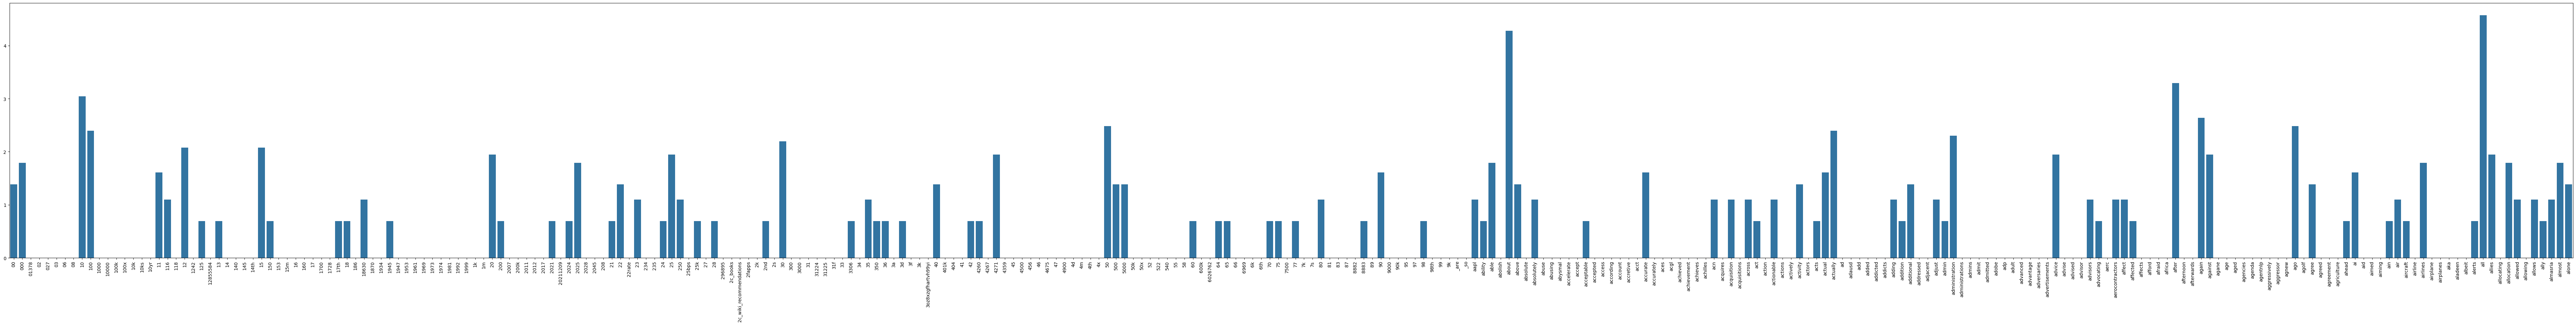

In [65]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### exercise 15
change the 'term_frequencies' variable for the 'term_frequencies_log'

In [66]:
term = count_vect.get_feature_names_out()[:300]

# plotly bar chart
fig = px.bar(x = term,
            y = term_frequencies_log[:300], 
            labels = {'x':'Term', 'y':'Log Frequency'}, 
            title = 'Log Term Frequency (first 300 terms)'
)

fig.update_xaxes(
    tickmode = 'array', # force x-axis to show
    tickvals = term, # values on x-axis
    ticktext = term, # labels on x-axis
    tickangle = 270,
    tickfont = dict(size = 8)
)

# adjust layout size
fig.update_layout(
    autosize = False,
    width = 2500,
    height = 600
)

fig.show()

# it is copy and modify from exercise 12, in that chart, it shows real counts, and small frequencies terms are not visible.
# by using log scale, small frequency terms are more visible because it reduces the gap between large and small values.
# so it is more suitable for visualizing overall distribution patterns.

## new dataset visualization (word cloud)

### before install wordcloud:
#### Activate the virtual environment
`source .venv/bin/activate`

#### Install pip if it is missing
`python -m ensurepip --upgrade`

In [67]:
import sys
!{sys.executable} -m pip install wordcloud


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


### Word Clouds with/without stopwords

In [68]:
from wordcloud import WordCloud

In [69]:
# Combine all text into one string
X_all_text = " ".join(X['text'].astype(str))

# word cloud of the whole text
X_wordcloud = WordCloud(width = 800, 
                        height = 400, 
                        background_color = 'white'
).generate(X_all_text)

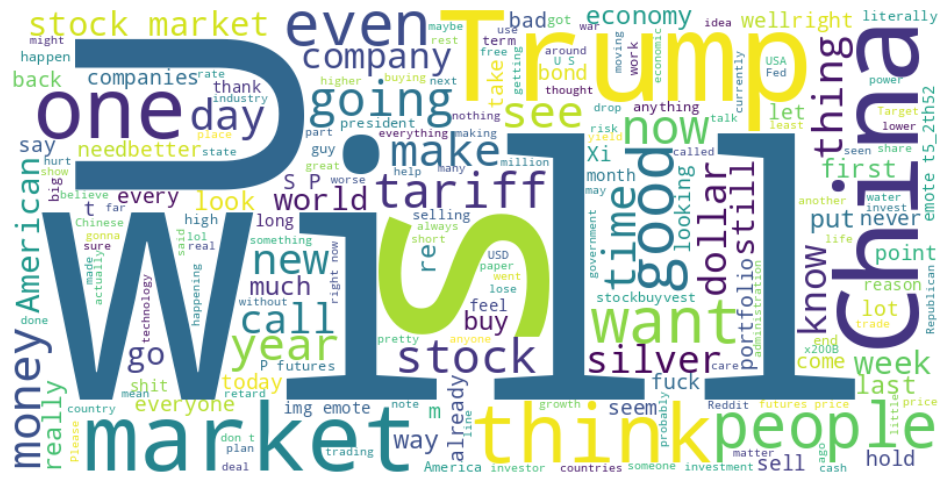

In [70]:
plt.figure(figsize = (12, 8))
plt.imshow(X_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [71]:
top_terms[0:50]

array(['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'for', 'this',
       'you', 'on', 'are', 'they', 'be', 'he', 'will', 'with', 'if', 'as',
       'market', 'but', 'not', 'so', 'have', 'all', 'us', 'just', 'was',
       'at', 'trump', 'my', 'what', 'can', 'like', 'we', 'or', 'has',
       'their', 'about', 'china', 'more', 'from', 'now', 'there', 'no',
       'by', 're', 'up', 'how'], dtype=object)

We can see that the largest terms in word cloud are *will*, *Trump*, *China*..., which do not match the results of `Top 150 Terms by Frequency bar chart` in exercise 14. 
In that bar chart, the most frequent words are "the", "to", "and", "is"... This is because the word cloud has built-in stopwords and automatically removes these words.


In [72]:
from wordcloud import STOPWORDS

STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

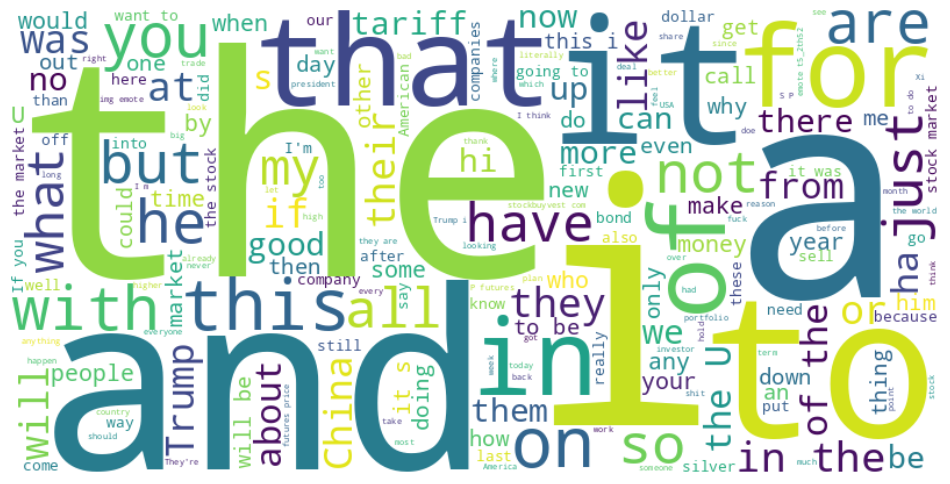

In [73]:
# word cloud of the whole text "without removing stopwords"
X_wordcloud_with_stopword = WordCloud(width = 800, 
                                    height = 400, 
                                    background_color = 'white',
                                    stopwords = set() # empty set
).generate(X_all_text)

plt.figure(figsize = (12, 8))
plt.imshow(X_wordcloud_with_stopword, interpolation = 'bilinear')
plt.axis("off")
plt.show()

We can see that the term `will` become smaller than before, and those high-frequency stopwords show up in this word cloud.

---

### Word Clouds Before and After Sampling

Compare the text before and after the sampling using word cloud (remove stopwords)

In [74]:
# Combine all text into one string
X_sample_all_text = " ".join(X_sample['text'].astype(str))

# word cloud of the sampled text
X_sample_wordcloud = WordCloud(width = 800, 
                               height = 400, 
                               background_color = 'white'
).generate(X_sample_all_text)

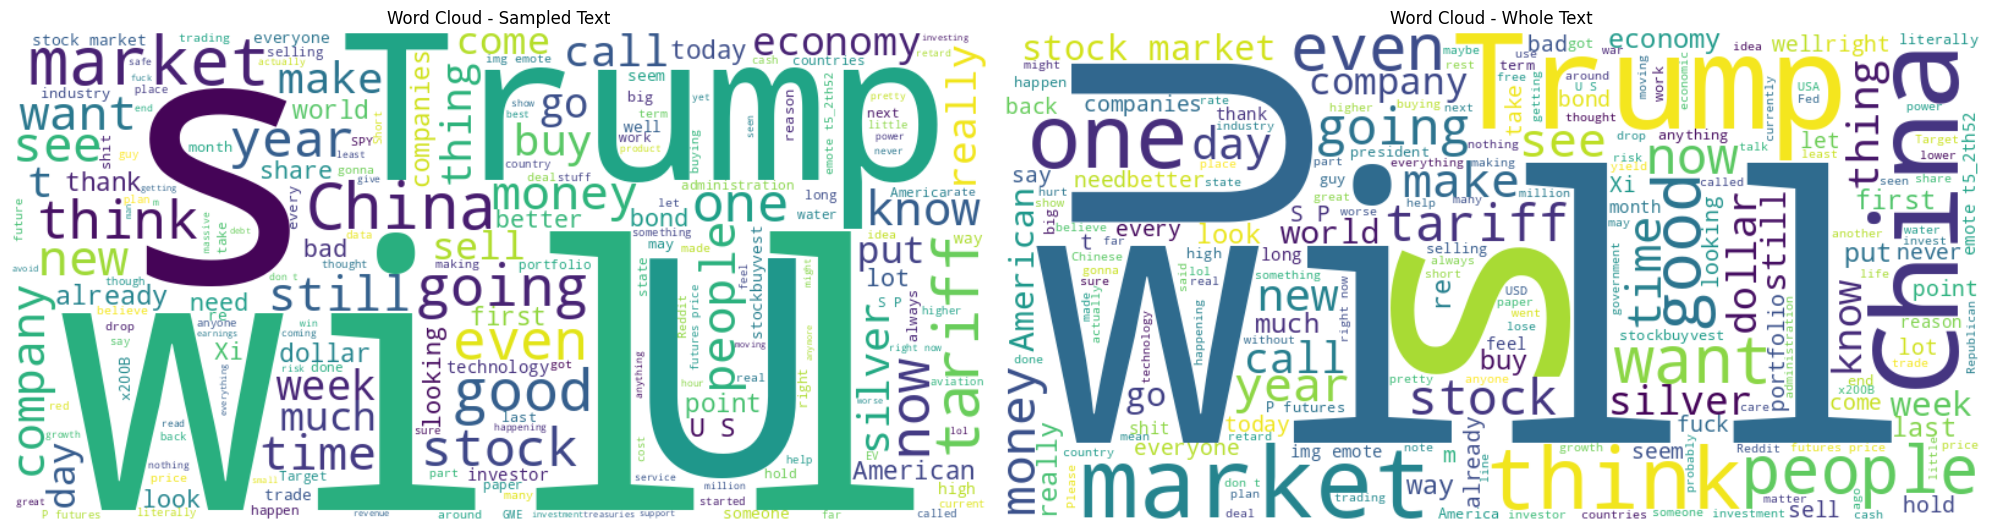

In [75]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

# word cloud of the sampled text
axes[0].imshow(X_sample_wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Word Cloud - Sampled Text")

# word cloud of the whole text
axes[1].imshow(X_wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Word Cloud - Whole Text")

plt.tight_layout()
plt.show()

These words show that the main discussion topics are about the U.S.-China trade war (Trump, China, tariff) and the financial market (market, stock, money, bond, silver, dollar). 
High-frequency terms (will, Trump, China, think, people) are less likely to disappear due to sampling. But low-frequency terms may differ more significantly before and after sampling so they may not appear in both word clouds.


---

### Exploring the Labels in the Dataset
Previously, we didn’t make use of the *label* column. Now, let’s take a look at it.


<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

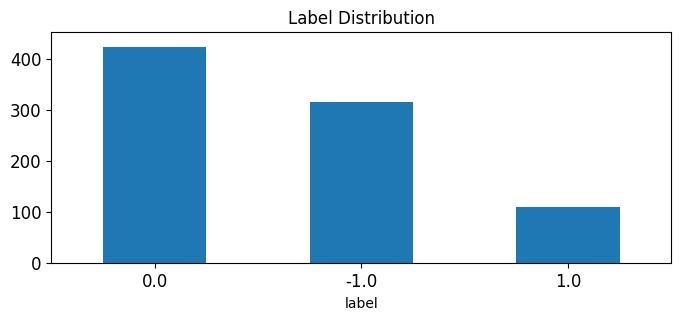

In [76]:
# label distribution
X['label'].value_counts().plot(
    kind = 'bar',
    title = 'Label Distribution',
    ylim = [0, X['label'].value_counts().max() + 30],
    rot = 0, fontsize = 12, figsize = (8, 3)
)

In [77]:
# the number of each label
label_counts = X['label'].value_counts()
print("label counts:")
print(label_counts)

label counts:
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


In [78]:
# some examples
print("\nexamples of positive texts:")
for text in X[X['label'] == 1.0]['text'].head(3):
    print("-", text)

print("\nexamples of neutral texts:")
for text in X[X['label'] == 0.0]['text'].head(3):
    print("-", text)

print("\nexamples of negative texts:")
for text in X[X['label'] == -1.0]['text'].head(3):
    print("-", text)


examples of positive texts:
- Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.  **Highlight Main Points**  * Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente. * The feat highlights the power of electric boating and pushes the limits of innovation. * Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.  **TLDR**  Hold onto your seats – Vision Marine Technologies Inc. and Shaun Torrente have shattered the water-speed record at an astonishing 116 mph!  This isn't just about speed; it's about pioneering electric boating and innovation. The collaboration of technology, skill, a

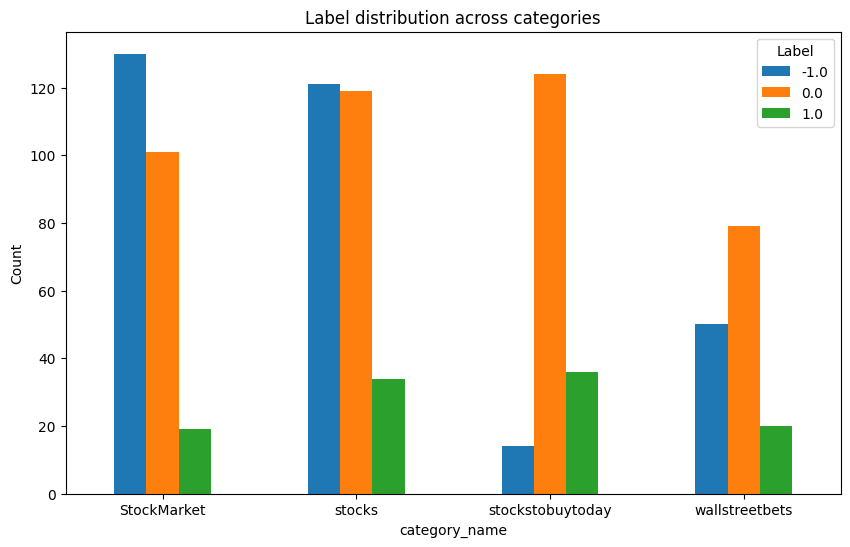

In [79]:
# label counts of each category_name
category_label_counts = pd.crosstab(X['category_name'], X['label'])

category_label_counts.plot(
    kind = 'bar',
    figsize = (10, 6) 
)

plt.title("Label distribution across categories")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.legend(title = "Label", loc = "upper right")
plt.show()

`StockMarket` and `stocks` have the most negative labels.
`stockstobuytoday` is dominated by neutral, show a more neutral discussion.
`wallstreetbets` has both neutral and negative labels in large numbers.

the discussions are mostly critical or neutral

---

### word cloud of three label
observe the key terms under each sentiment

In [80]:
def plot_wordcloud_by_label(data, label_value, title):
    text_data = " ".join(data[data['label'] == label_value]['text'].astype(str))
    wc = WordCloud(width = 800, height = 400, background_color = 'white').generate(text_data)

    plt.figure(figsize = (12, 8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(title, fontsize = 20)
    plt.show()

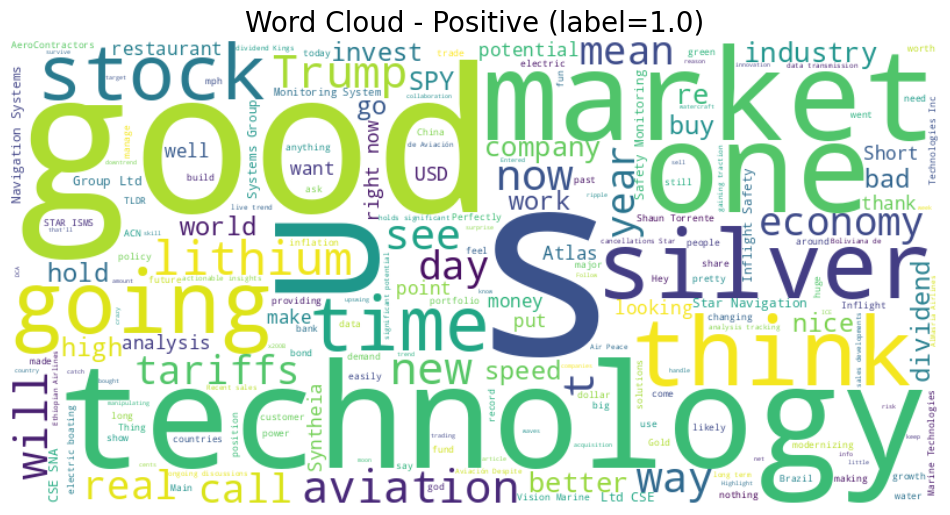

In [81]:
plot_wordcloud_by_label(X, 1.0, "Word Cloud - Positive (label=1.0)")

In positive word cloud, it shows positive sentiment such as `good,` `better`, `nice`, and `thank`. There are also words like `buy`, `invest`, `work`, `going`, and `think`, which may further suggest forward-looking, and shows confidence and optimism.


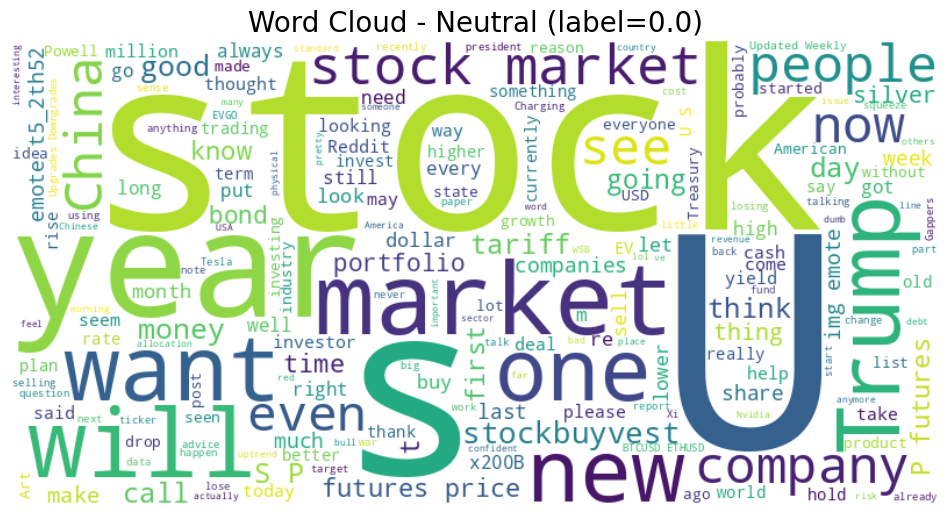

In [82]:
plot_wordcloud_by_label(X, 0.0, "Word Cloud - Neutral (label=0.0)")

In neutral word cloud, the most frequent terms are `stock`, `market`, `year`, `company`, which usually reflect factual discussions. 
Most of the terms report or describe economy rather than express attitudes.

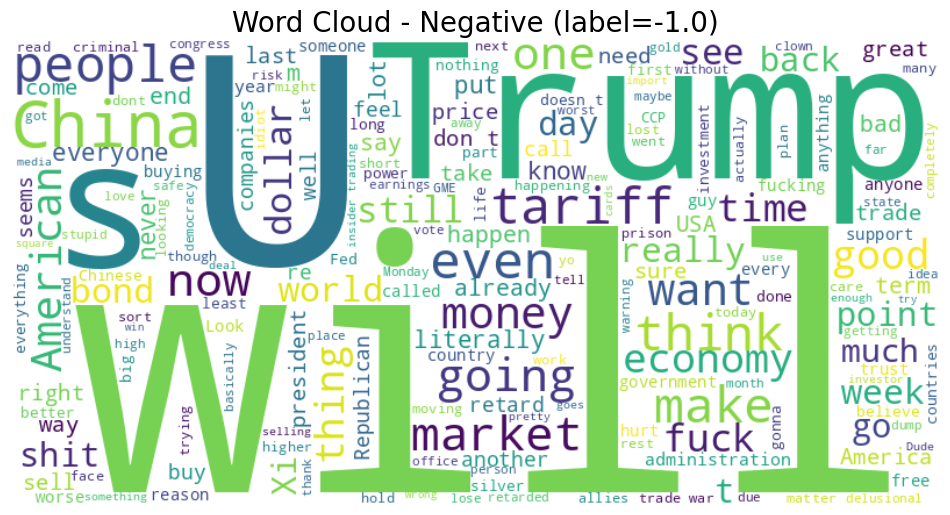

In [83]:
plot_wordcloud_by_label(X, -1.0, "Word Cloud - Negative (label=-1.0)")

In the negative word cloud, the terms show concerns. Words like `tariff`, `Trump`, `China` and `trade` emphasize the U.S.-China trade war.
`money` and `dollar` appear larger compared to the other two word clouds, financial worries may exist in some dicussion.
Negative expressions like `bad`, `loss`, `fuck` reflect dissatisfaction.
The term `will` appears especially large, which may indicate concerns about what will happen in the future.


# Phase 2

In [86]:
### Begin Assignment Here

####  4.4.2 Finding frequent patterns

convert text data into transactional form and mine frequent patterns from it

first, mine patterns that can be representative to **each category**, we will be able to differentiate each group of data more easily.

In [84]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [ ]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

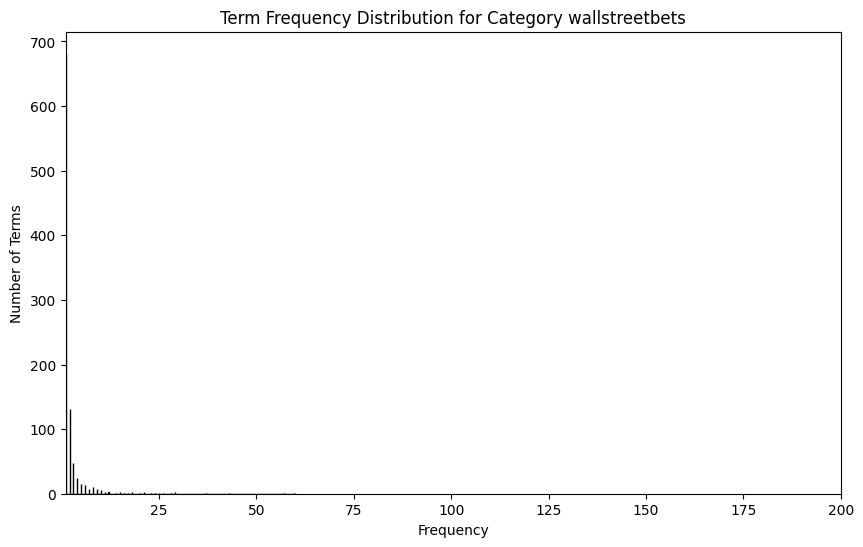

In [86]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

However, very rare words or extremely common words don’t usually give us much useful information. We can filter out these words.

In [87]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: wallstreetbets
Number of terms in top 5%: 48
Filtered terms: ['to', 'the', 'it', 'and', 'in', 'is', 'you', 'for', 'they', 'this', 'of', 'that', 'my', 'on', 't5_2th52', 'img', 'emote', 'so', 'like', 'can', 'just', 'but', 'at', 'are', 'have', 'was', 'all', 'over', 'not', 'now', 'will', 'be', 'we', 'target', 'no', 'there', 'about', 'puts', 'good', 'up', 'what', 'if', 'go', 'when', 'still', 'with', 'market', 'she']


In [88]:
sorted_counts

array([60, 57, 43, 37, 29, 29, 28, 26, 25, 24, 23, 21, 21, 20, 18, 18, 18,
       17, 16, 15, 15, 15, 14, 12, 12, 11, 11, 11, 10, 10, 10, 10, 10, 10,
        9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [89]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: wallstreetbets
Number of terms in bottom 1%: 9
Filtered terms: ['zero', 'intern', 'international', 'store', 'investing', 'investment', 'ip', 'ipo', 'iq']


In [90]:
sorted_counts

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    bottom_words = sorted_words.head(bottom_n)
    top_words = sorted_words.tail(top_n)
    bottom_words.to_csv(f"{category}_bottom_words.csv", header=['count'])
    top_words.to_csv(f"{category}_top_words.csv", header=['count'])
    print(f"Saved {category}_bottom_words.csv and {category}_top_words.csv")
    
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


### exercise 16
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [95]:
# In the top 5%, there are also many stop words,
# and all four categories contain the word 'market'.
# If these words are not filtered out, they might not help much for later work.

# For bottom 1%:
# StockMarket: only 'miscalculated' is clearly related to the topic
# stocks: the related word is negotiating
# stockstobuytoday: the only related one is microstrategy
# wallstreetbets: contains words like investing

# Compared with the newsgroups dataset in master.ipynb,
# these texts are shorter, so the generated matrix is smaller, and fewer words are filtered.

In [92]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 248
Number of items : 1499
Minimum Transaction Size : 1
Average Transaction Size : 10.153225806451612
Maximum Transaction Size : 145
Standard Deviation Transaction Size : 12.30692458821371
Variance in Transaction Sizes : 152.07359279091028
Sparsity : 0.993226667240526


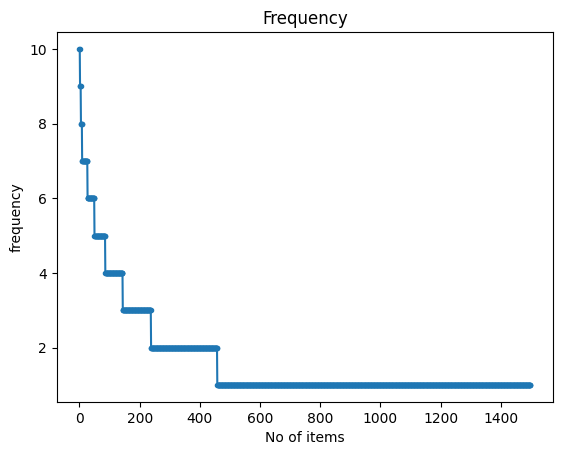

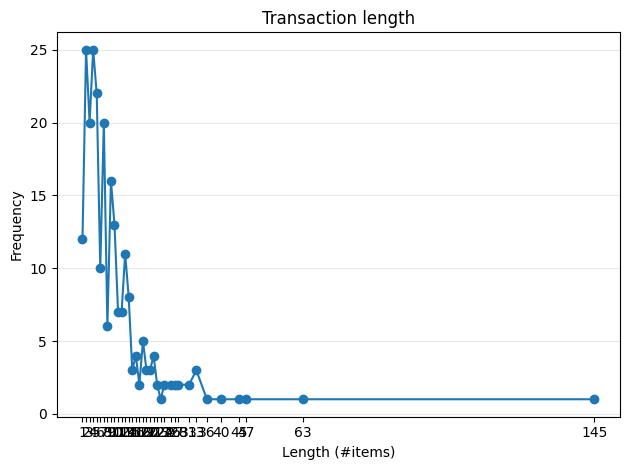

In [93]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.284671532846716
Maximum Transaction Size : 165
Standard Deviation Transaction Size : 17.008134123176575
Variance in Transaction Sizes : 290.3362476939119
Sparsity : 0.993524627591638


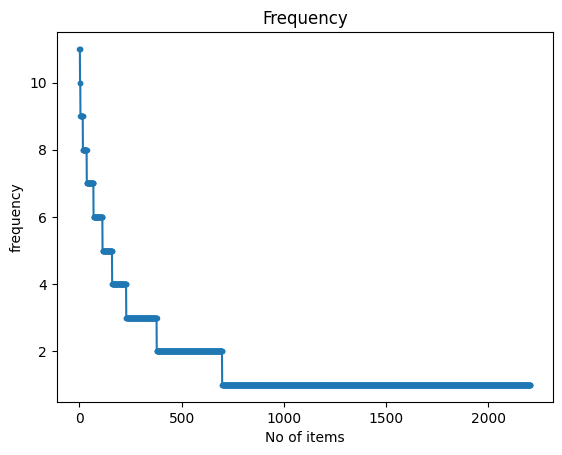

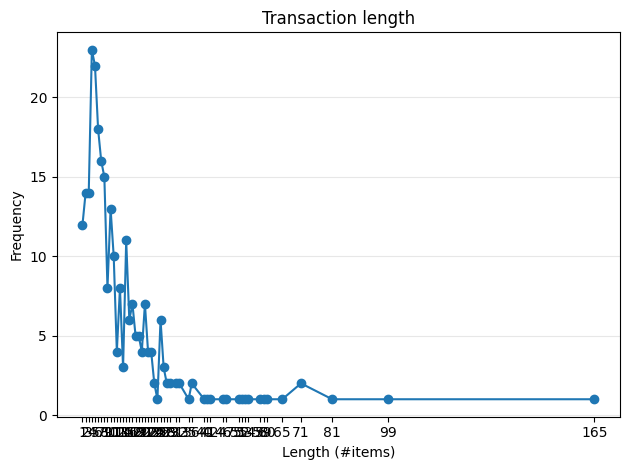

In [94]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 172
Number of items : 1522
Minimum Transaction Size : 1
Average Transaction Size : 14.046511627906977
Maximum Transaction Size : 219
Standard Deviation Transaction Size : 25.67570880647662
Variance in Transaction Sizes : 663.0972392220863
Sparsity : 0.9907710173272621


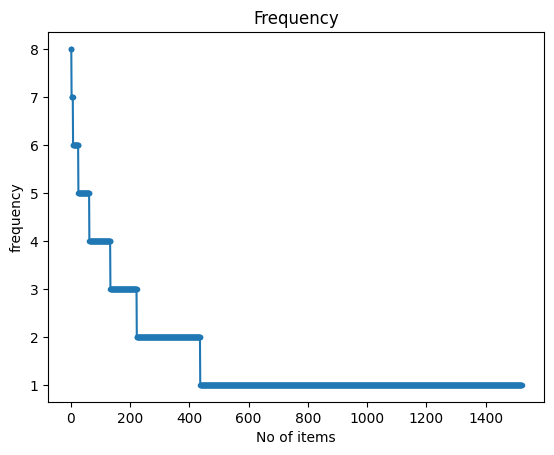

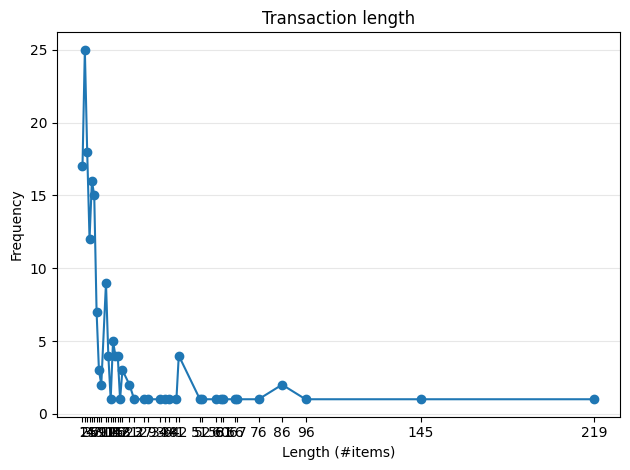

In [95]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 146
Number of items : 915
Minimum Transaction Size : 1
Average Transaction Size : 9.308219178082192
Maximum Transaction Size : 62
Standard Deviation Transaction Size : 9.376131945174984
Variance in Transaction Sizes : 88.51813887576759
Sparsity : 0.9898270828654839


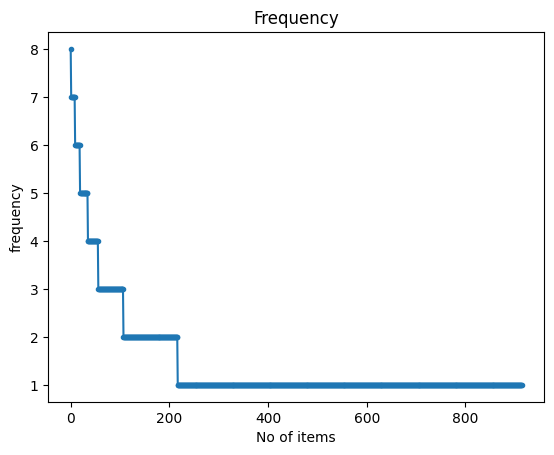

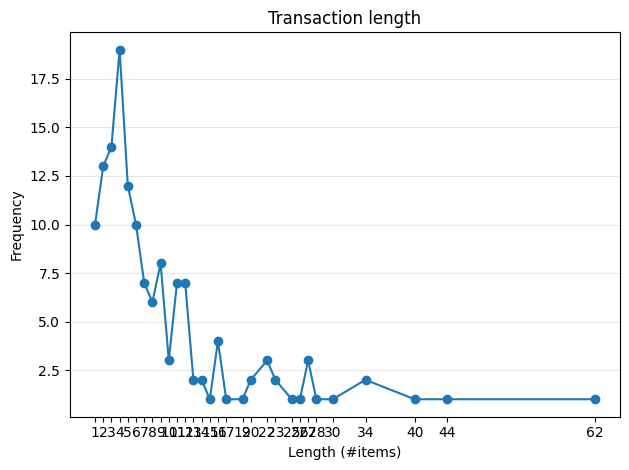

In [96]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

we can see that our databases are very sparse, this is the result of having many zeros in the first place when making the document-term matrix. 

Determine the *minimum support* (frequency) that our algorithm will use to mine for patterns in our transactions. 


In [97]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=2
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1024
Runtime: 0.0066874027252197266


In [ ]:
obj1.save('freq_patterns_StockMarket_minSup2.txt') #save the patterns
frequentPatternsDF_StockMarket

In [99]:
minSup=2
obj2 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_stocks= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10951
Runtime: 0.021691083908081055


In [ ]:
obj2.save('freq_patterns_stocks_minSup2.txt') #save the patterns
frequentPatternsDF_stocks

In [101]:
minSup=5
obj3 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_stockstobuytoday= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2105
Runtime: 0.027987003326416016


In [ ]:
obj3.save('freq_patterns_stockstobuytoday_minSup5.txt') #save the patterns
frequentPatternsDF_stockstobuytoday

In [103]:
minSup=2
obj4 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_wallstreetbets= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 350
Runtime: 0.004148006439208984


In [ ]:
obj4.save('freq_patterns_wallstreetbets_minSup2.txt') #save the patterns
frequentPatternsDF_wallstreetbets

To identify and use only the unique patterns that are specific to each category. This involves filtering out any patterns that are common across multiple categories.

In [105]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_StockMarket, frequentPatternsDF_stocks, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_wallstreetbets]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                                Patterns  Support
747                                                there       10
11406                                             reddit        9
11392                                             buying        9
741                                              because        8
13472                                         highlights        8
...                                                  ...      ...
4614   price\tstock\tinvestors\tneed\town\told\tthrea...        2
4615   price\tstock\tinvestors\tneed\town\thelp\tthre...        2
4616   price\tstock\tinvestors\tneed\town\tinvesting\...        2
4617   price\tstock\tinvestors\tneed\told\thelp\tthre...        2
6843   price\tstock\tinvestors\tneed\town\told\thelp\...        2

[13686 rows x 2 columns]
Number of patterns discarded: 744


Converting the patterns into binary data within the columns of our document-term matrix. 

If a pattern is found in the document, we'll mark it with a '1'; if it's not present, we'll mark it with a '0'.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

### exercise 17

Implement the FAE Top-K and MaxFPGrowth algorithms to analyze the 'stocks' category in our processed database. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm.

In [107]:
from PAMI.frequentPattern.topk import FAE as fae_alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp_alg
transactions_path = 'td_freq_db_stocks.csv'

FAE Top-k

In [108]:
k_values = [300, 450, 600]
fae_runs = []
fae_patterns = {}

for k_val in k_values:
    fae = fae_alg.FAE(iFile = transactions_path, k = k_val, sep = '\t')
    fae.mine()
    runtime = fae.getRuntime()
    patterns_df = fae.getPatternsAsDataFrame()

    fae_runs.append({
        'k': k_val,
        'runtime': runtime,
        'num_patterns': len(patterns_df),
    })
    fae_patterns[k_val] = patterns_df

fae_summary = pd.DataFrame(fae_runs)
fae_summary

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.


k   runtime  num_patterns
0  300  0.015416           300
1  450  0.359083           450
2  600  0.409566           600

MaxFPGrowth

In [109]:
minsup = [2, 4, 6]
maxfp_runs = []
maxfp_patterns = {}

for minsup in minsup:
    maxfp = maxfp_alg.MaxFPGrowth(iFile = transactions_path, minSup = minsup, sep = '\t')
    maxfp.mine()
    runtime = maxfp.getRuntime()
    patterns_df = maxfp.getPatternsAsDataFrame()

    maxfp_runs.append({
        'minsup': minsup,
        'runtime_sec': runtime,
        'num_patterns': len(patterns_df),
    })
    maxfp_patterns[minsup] = patterns_df

maxfp_summary = pd.DataFrame(maxfp_runs)
maxfp_summary

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


minsup  runtime_sec  num_patterns
0       2     0.021578           782
1       4     0.005506           228
2       6     0.002852           113

comparison

In [110]:
report_rows = []

for k_val, row in fae_summary.set_index('k').iterrows():
    runtime_val = row.get('runtime_sec', row.get('runtime'))
    report_rows.append({
        'algorithm': 'FAE Top-K',
        'setting': f'k={k_val}',
        'runtime_sec': runtime_val,
        'num_patterns': row['num_patterns'],
        'avg_support': fae_patterns[k_val]["Support"].mean(),
        'median_support': fae_patterns[k_val]["Support"].median(),
    })

for minsup, row in maxfp_summary.set_index('minsup').iterrows():
    runtime_val = row.get('runtime_sec', row.get('runtime'))
    report_rows.append({
        'algorithm': 'MaxFPGrowth',
        'setting': f'minSup={minsup}',
        'runtime_sec': runtime_val,
        'num_patterns': row['num_patterns'],
        'avg_support': maxfp_patterns[minsup]["Support"].mean(),
        'median_support': maxfp_patterns[minsup]["Support"].median(),
    })

report_rows.append({
    'algorithm': 'FPGrowth',
    'setting': f'minSup={minSup}',
    'runtime_sec': obj2.getRuntime(),
    'num_patterns': len(frequentPatternsDF_stocks),
    'avg_support': frequentPatternsDF_stocks["Support"].mean(),
    'median_support': frequentPatternsDF_stocks["Support"].median(),
})

comparison_report = pd.DataFrame(report_rows)
comparison_report

algorithm   setting  runtime_sec  num_patterns  avg_support  \
0    FAE Top-K     k=300     0.015416         300.0     5.110000   
1    FAE Top-K     k=450     0.359083         450.0     4.360000   
2    FAE Top-K     k=600     0.409566         600.0     3.770000   
3  MaxFPGrowth  minSup=2     0.021578         782.0     2.141944   
4  MaxFPGrowth  minSup=4     0.005506         228.0     5.728070   
5  MaxFPGrowth  minSup=6     0.002852         113.0     7.150442   
6     FPGrowth  minSup=2     0.021691       10951.0     2.096977   

   median_support  
0             5.0  
1             4.0  
2             3.0  
3             2.0  
4             5.0  
5             7.0  
6             2.0

FPGrowth: When minSup = 5, the algorithm generates 10,951 patterns with an average support of 2.10, it lists most of the frequent subsets.

The runtime is 0.023 seconds, still very fast, and the number of outputs is very large compared to the other algorithms.

#### 4.5 Dimensionality Reduction

Create a 2D plot after applying these algorithms to our dataframes.

In [111]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [112]:
X_pca_tdm.shape

(847, 2)

In [113]:
X_tsne_tdm.shape

(847, 2)

In [114]:
X_umap_tdm.shape

(847, 2)

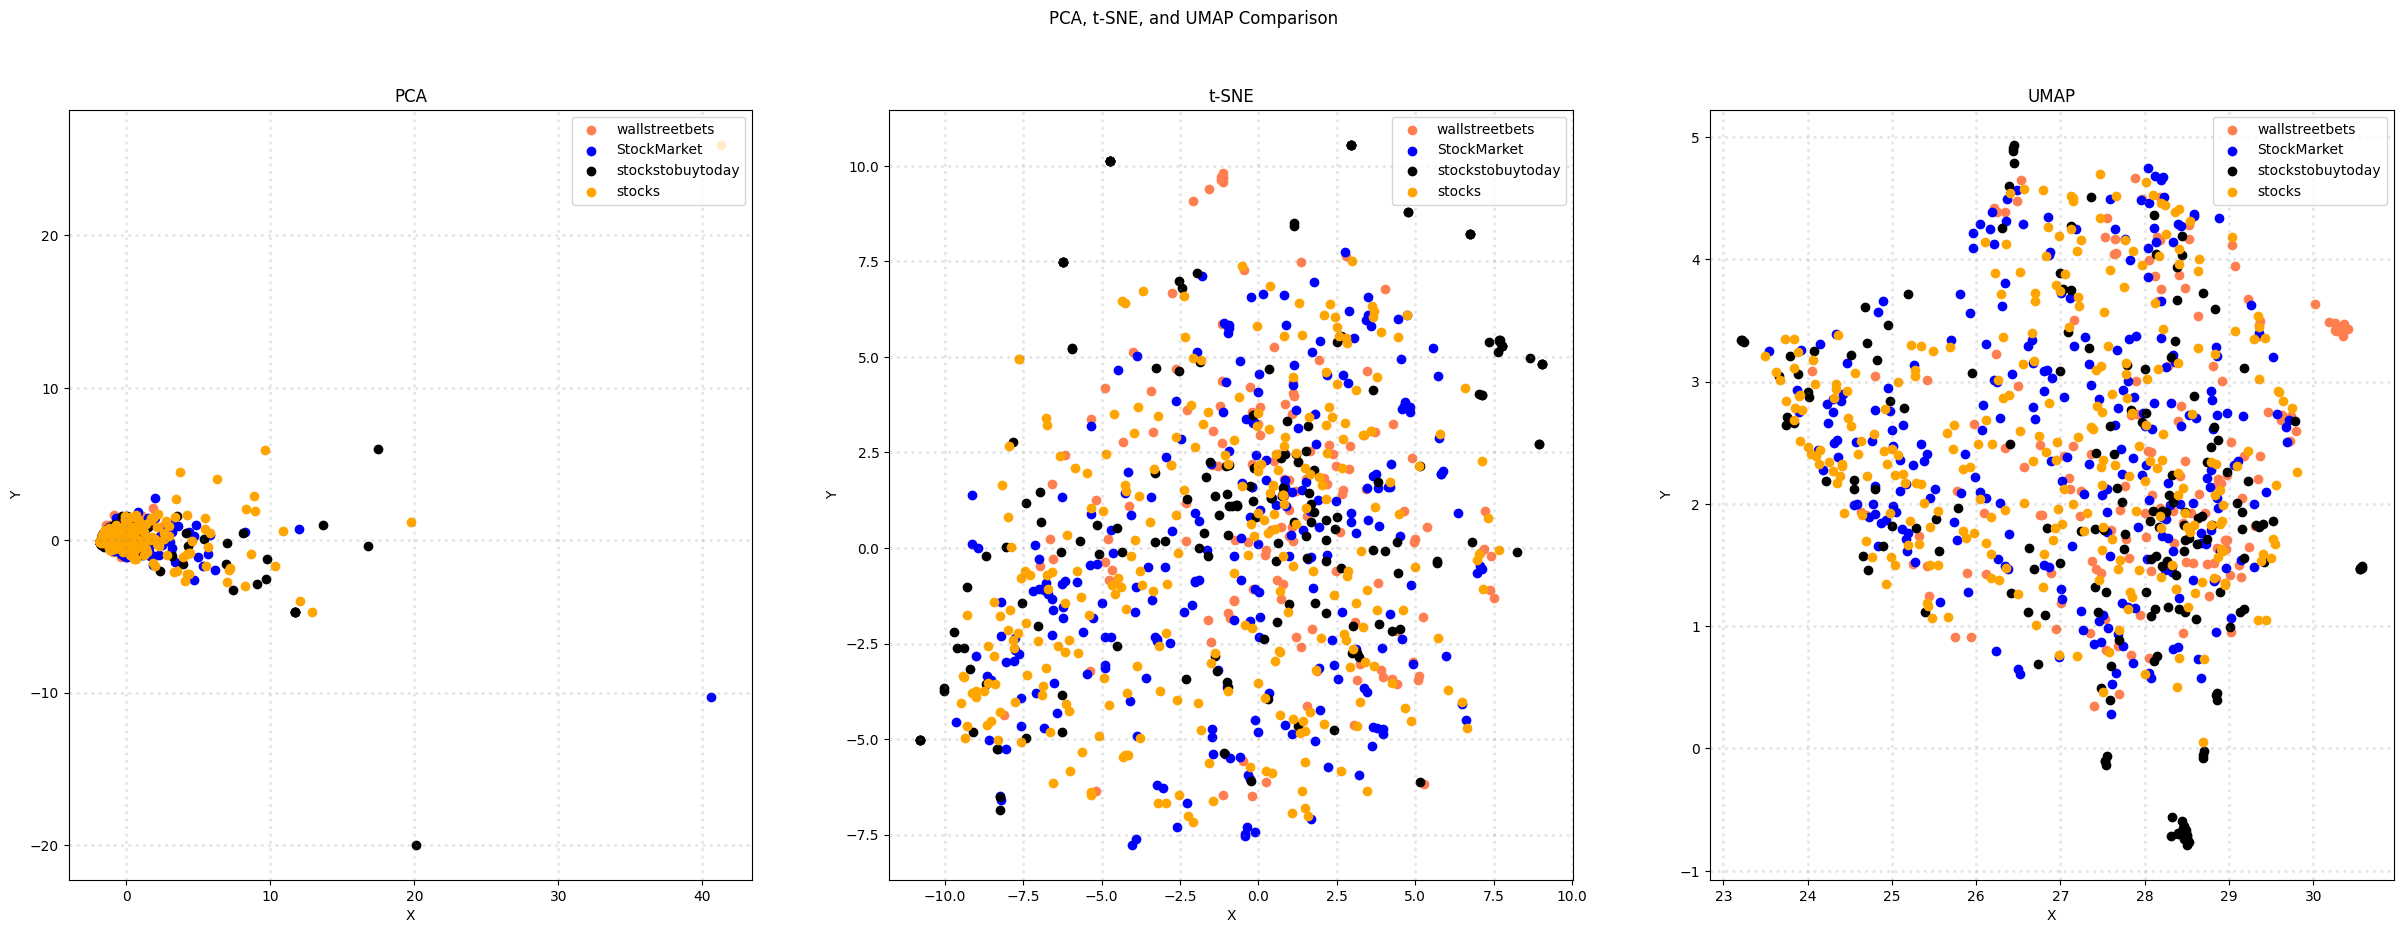

In [115]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

Now let's try in tandem with our pattern augmented data:

In [116]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

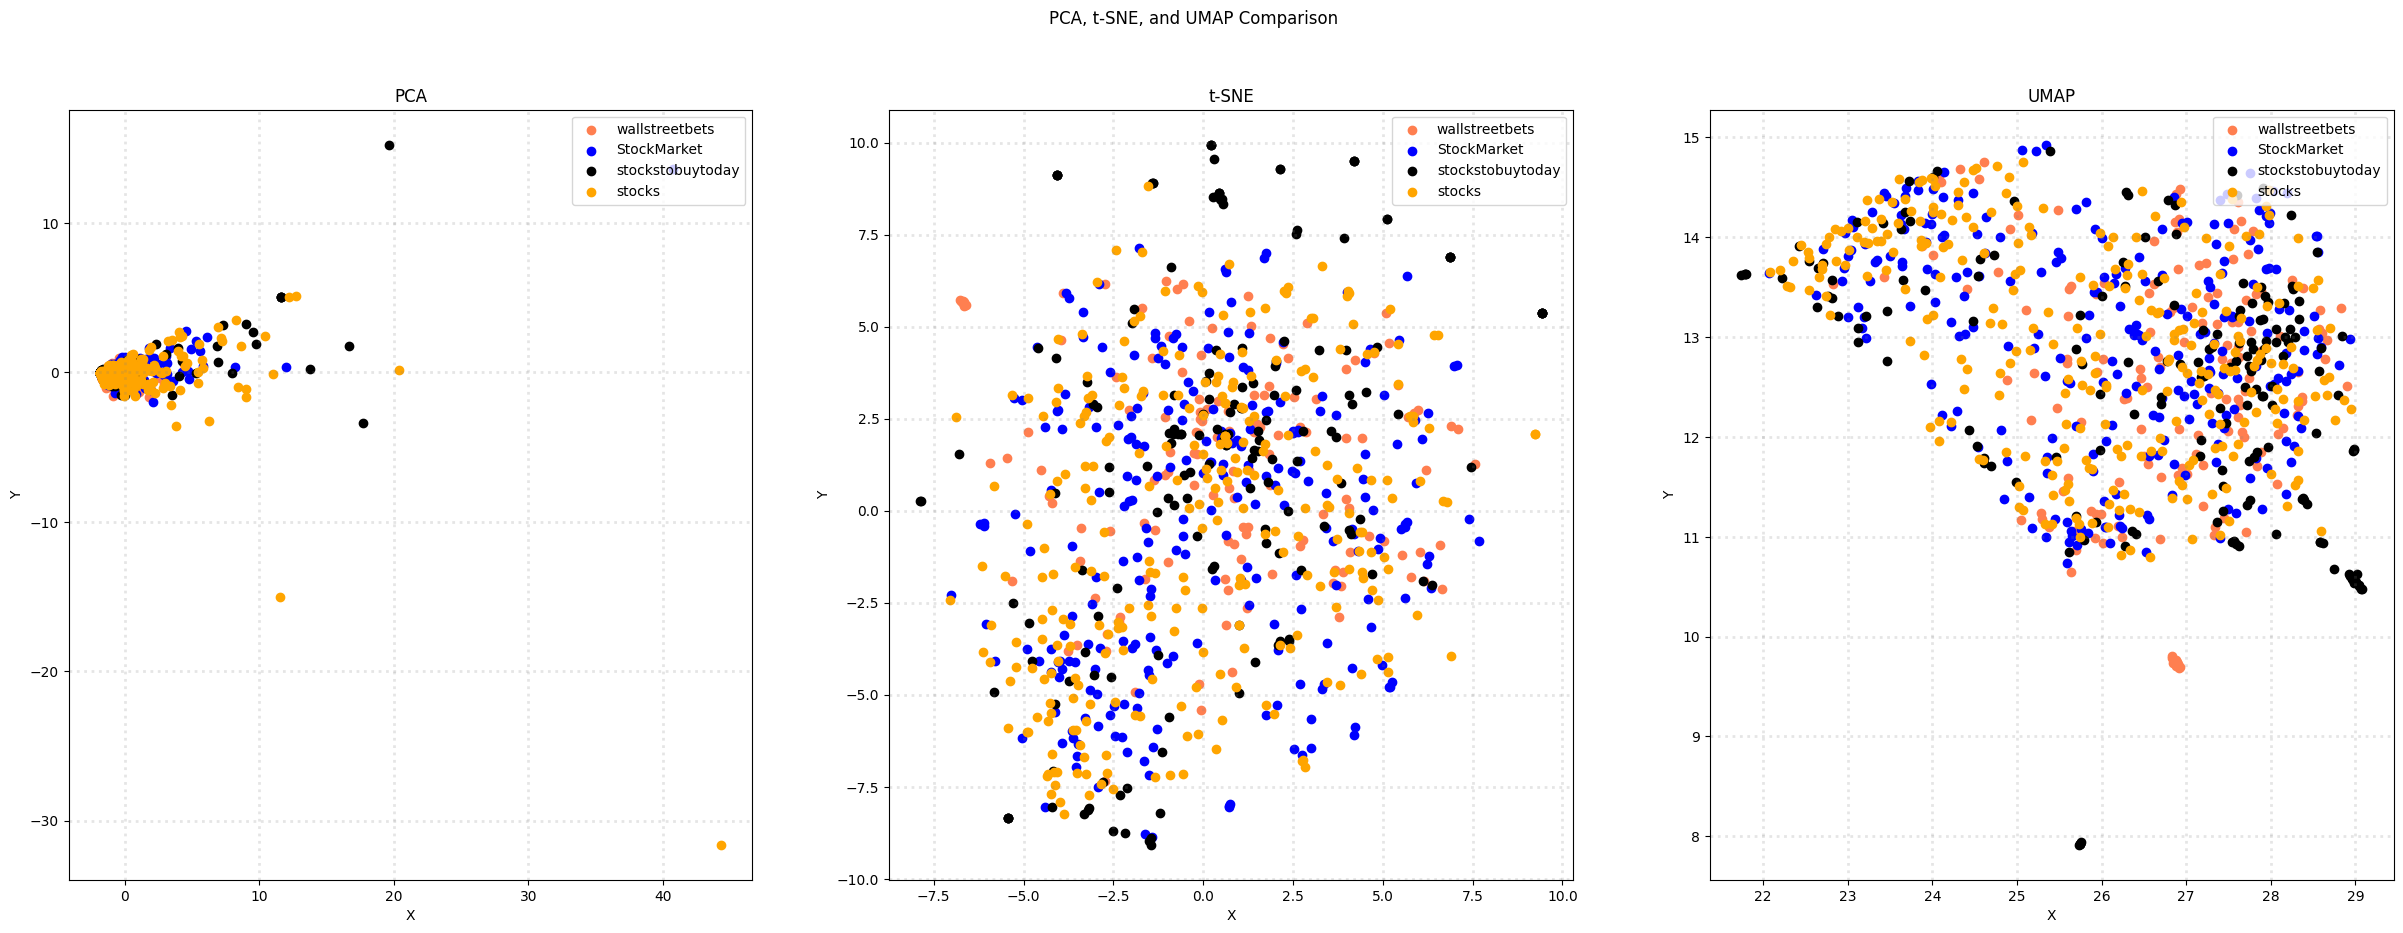

In [117]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### exercise 18

try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

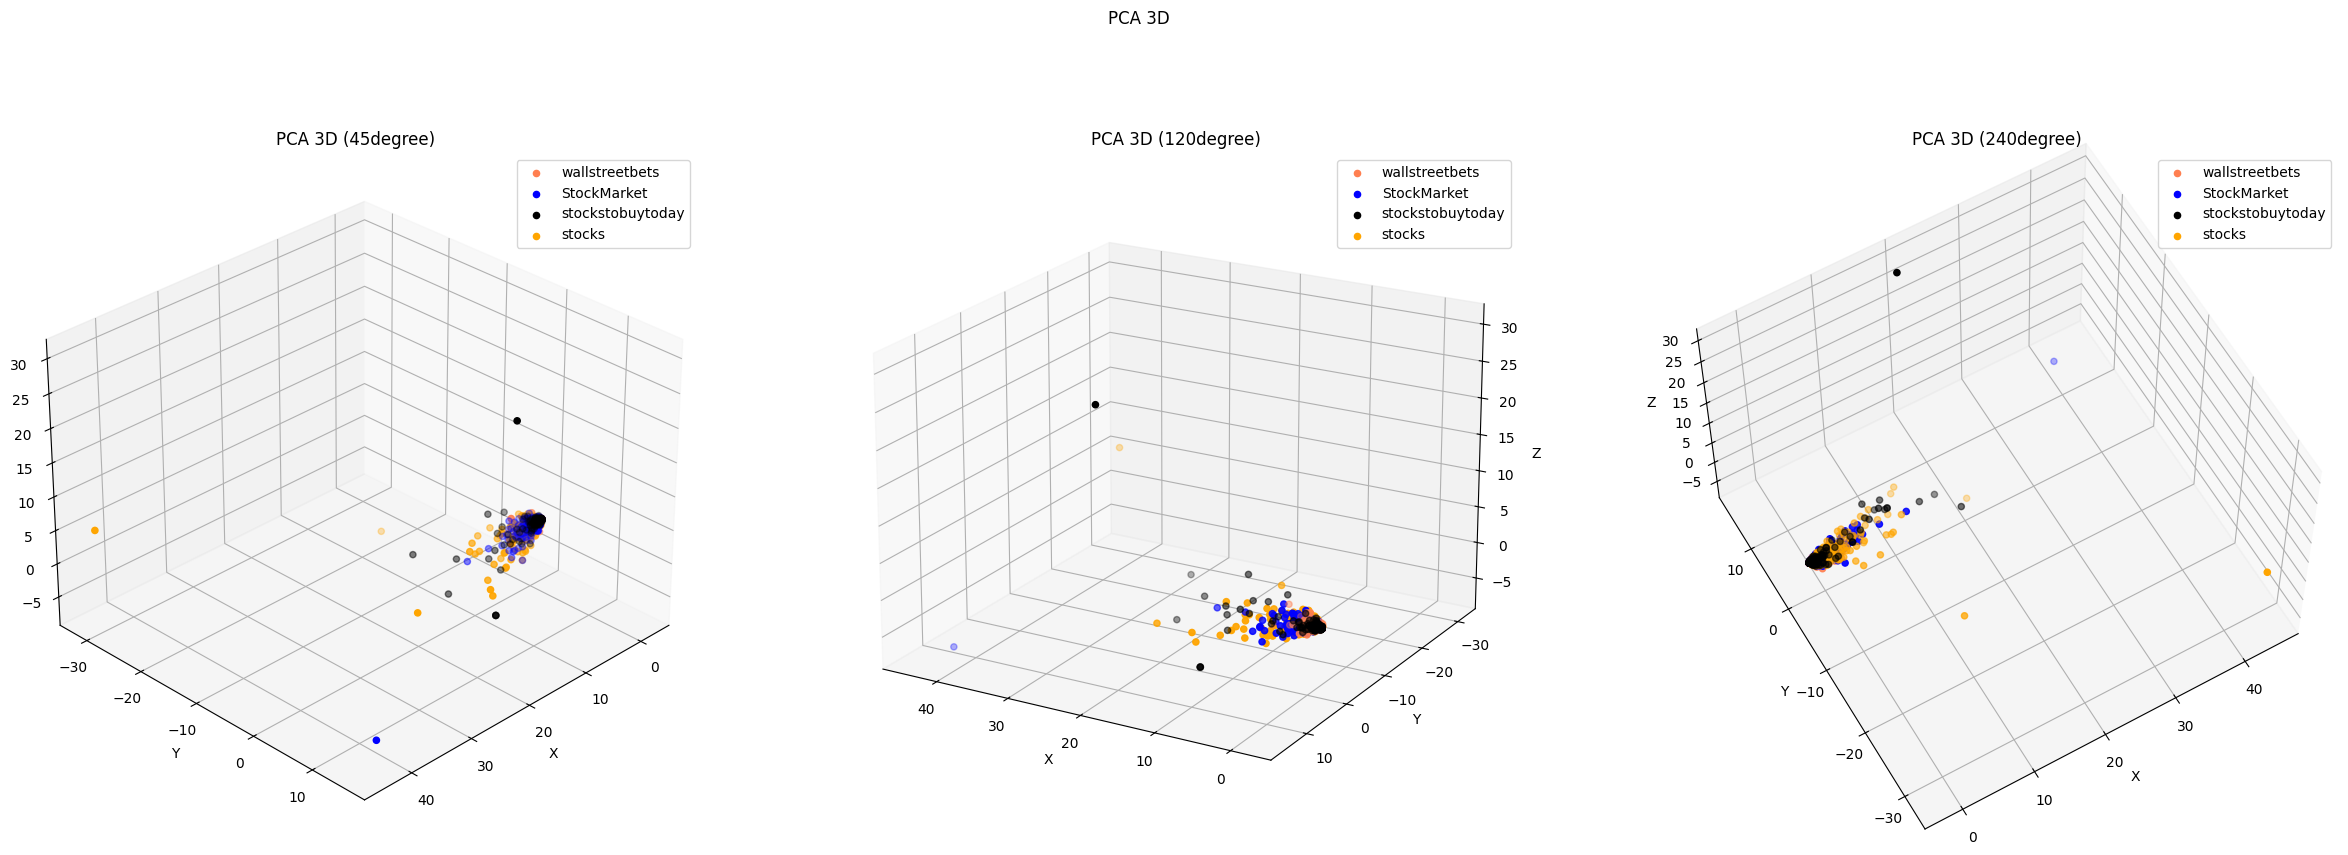

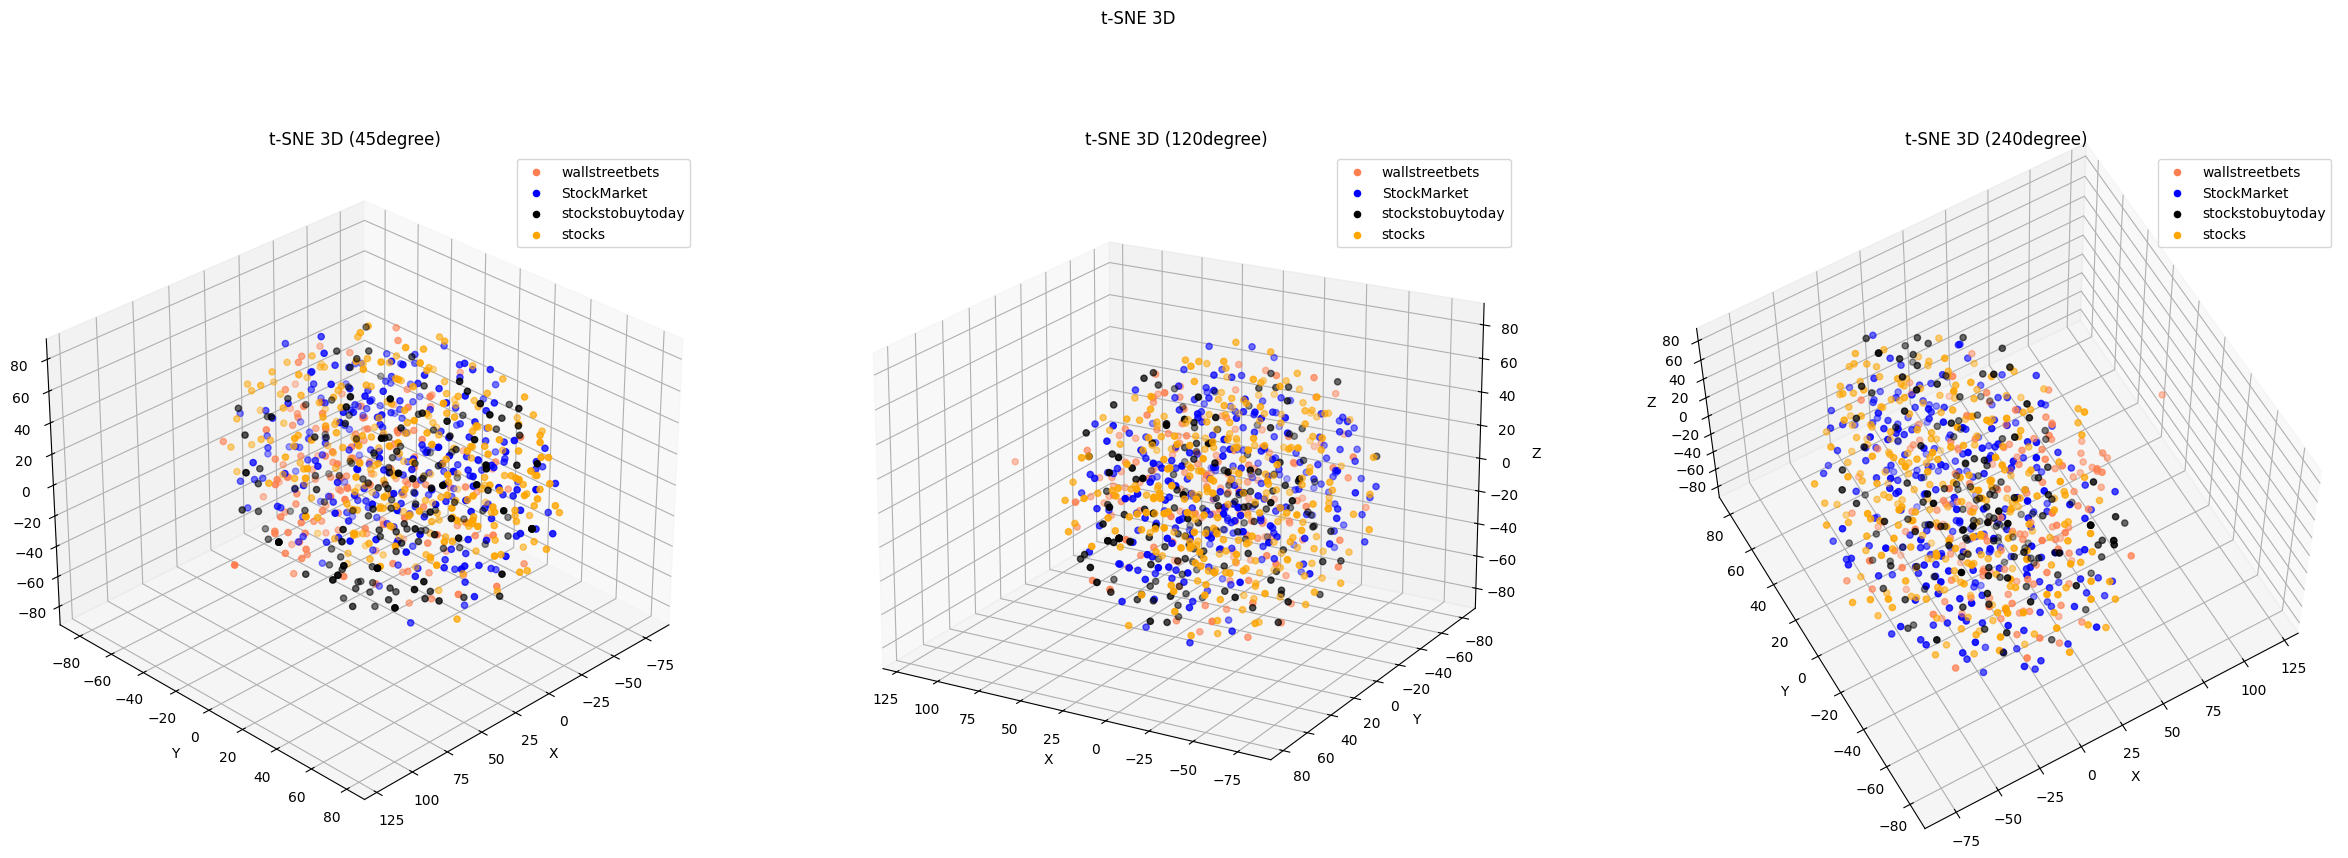

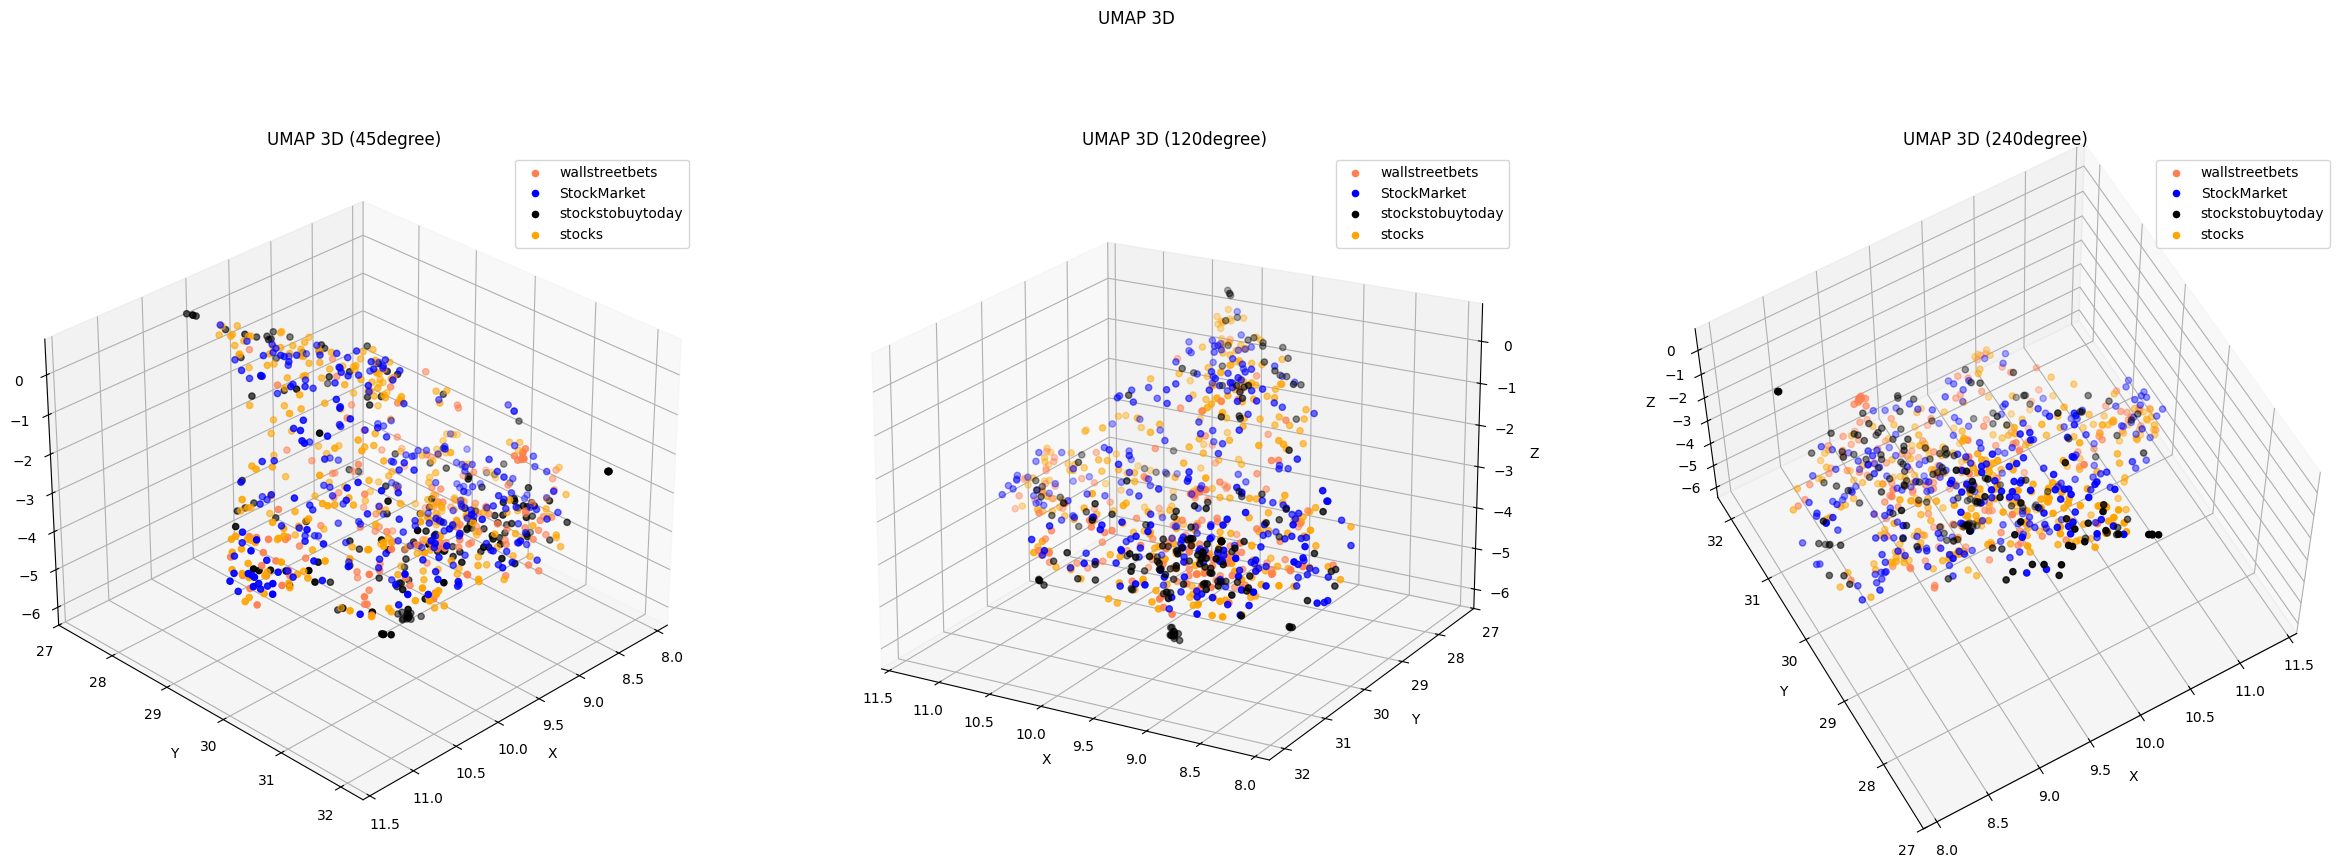

In [118]:
# 3-D

X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

def plot_3d(X_reduced, title):
    view_angles = [(30, 45), (20, 120), (60, 240)] # 3 angles
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(title)

    for i, (elev, azim) in enumerate(view_angles):
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')
        for c, category in zip(col, categories):
            xs = X_reduced[X['category_name'] == category, 0]
            ys = X_reduced[X['category_name'] == category, 1]
            zs = X_reduced[X['category_name'] == category, 2]
            ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

        ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        ax.set_title(f'{title} ({azim}degree)')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.view_init(elev=elev, azim=azim)
        ax.legend(loc='upper right')

    plt.show()

plot_3d(X_pca_3d, 'PCA 3D')
plot_3d(X_tsne_3d, 't-SNE 3D')
plot_3d(X_umap_3d, 'UMAP 3D')

PCA: Most points are highly overlapped, there is no clear boundaries between different categories.

t-SNE: Most points are mixed together in the center area, no clear clusters.

UMAP: Although the shape changes slightly from different angles, it is still hard to distinguish the categories.

#### 4.6 Discretization and Binarization
We are taking the category name and replacing it with a `n` asymmetric binary attributes.

In [119]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [120]:
mlb = preprocessing.LabelBinarizer()

In [121]:
mlb.fit(X.category_name)

LabelBinarizer()

In [122]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [123]:
X[0:9]

text  label     category_name  \
0                                   Calls on retards   -1.0    wallstreetbets   
1  Stunt as in like why did they even make a big ...    0.0    wallstreetbets   
2                  Seeing lots of red in the ticker.    0.0       StockMarket   
3  Vision Marine Technologies Inc. is rewriting t...    1.0  stockstobuytoday   
4                           He didn’t say thank you.   -1.0       StockMarket   
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0    wallstreetbets   
6  Trump will respond to china increasing their t...   -1.0            stocks   
7  Confirmed not a trap. Its been like this for p...    0.0    wallstreetbets   
8  Am I the only one seeing the cup & handle brea...    1.0            stocks   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   
3  [Vision, Marine, Technologies, Inc., is, rewri...   
4               [He, didn, ’, t, say, thank, you, .]   
5  [Hoping, to, ejaculate, in, wet, warm, puss, t...   
6  [Trump, will, respond, to, china, increasing, ...   
7  [Confirmed, not, a, trap, ., Its, been, like, ...   
8  [Am, I, the, only, one, seeing, the, cup, &, h...   

                                      tokenized_text  bin_category  
0                               {retards, Calls, on}  [0, 0, 0, 1]  
1  {in, big, the, first, Stunt, place?, should, m...  [0, 0, 0, 1]  
2          {lots, in, ticker., the, red, Seeing, of}  [1, 0, 0, 0]  
3  {this, rewriting, Power, watercraft., your, ma...  [0, 0, 1, 0]  
4                     {He, thank, say, didn’t, you.}  [1, 0, 0, 0]  
5  {me, in, to, warm, ejaculate, luck, puss, wish...  [0, 0, 0, 1]  
6  {adjust, downwards, the, weeks, next, and, rep...  [0, 1, 0, 0]  
7  {this, trap., slowly, Its, been, probably, spr...  [0, 0, 0, 1]  
8  {one, cup, the, Third, on, line, Am, here?, Da...  [0, 1, 0, 0]

### exercise 19
skip this exercise in this file

# 5. Data Exploration

In [124]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[100]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[150]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[200]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [125]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['What’s your average price on RDDt?']
['I need people to understand this man is NOT stupid. You want him to be so bad but he is NOT. Everything he is currently doing is apart of the plan. The major goal is to crash the economy and the USD and build a new US and USD. Please wake up.']


In [126]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [127]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.133631
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/452772485.py:17: Dep

### exercise 20
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [128]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[2]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[20]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[200]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Seeing lots of red in the ticker.']
['Nooo dont go down its smug bull day']
['I need people to understand this man is NOT stupid. You want him to be so bad but he is NOT. Everything he is currently doing is apart of the plan. The major goal is to crash the economy and the USD and build a new US and USD. Please wake up.']


In [129]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [130]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.188982
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/3530576229.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/3530576229.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/3530576229.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/0p/bgqykj_5115_m98bq1v0q_k40000gn/T/ipykernel_67704/3530576229.py:15:

In [131]:
X.loc[[100, 150, 200, 2, 20, 200]]

text  label category_name  \
100  Do we have a copy of trump’s kindergarten grad...   -1.0   StockMarket   
150                 What’s your average price on RDDt?    0.0        stocks   
200  I need people to understand this man is NOT st...    1.0   StockMarket   
2                    Seeing lots of red in the ticker.    0.0   StockMarket   
20                 Nooo dont go down its smug bull day   -1.0        stocks   
200  I need people to understand this man is NOT st...    1.0   StockMarket   

                                              unigrams  \
100  [Do, we, have, a, copy, of, trump, ’, s, kinde...   
150    [What, ’, s, your, average, price, on, RDDt, ?]   
200  [I, need, people, to, understand, this, man, i...   
2          [Seeing, lots, of, red, in, the, ticker, .]   
20        [Nooo, dont, go, down, its, smug, bull, day]   
200  [I, need, people, to, understand, this, man, i...   

                                        tokenized_text  bin_category  
100  {version., trump’s, Ideally, long, copy, kinde...  [1, 0, 0, 0]  
150          {average, on, your, What’s, RDDt?, price}  [0, 1, 0, 0]  
200  {this, plan., crash, doing, the, USD, major, b...  [1, 0, 0, 0]  
2            {lots, in, ticker., the, red, Seeing, of}  [1, 0, 0, 0]  
20        {Nooo, dont, down, day, its, bull, smug, go}  [0, 1, 0, 0]  
200  {this, plan., crash, doing, the, USD, major, b...  [1, 0, 0, 0]

Because the dataset is too small and each text is very short, it’s difficult to get good results from such limited content. Therefore, the cosine similarities are all very low.


# 6. Data Classification
We will implement a Multinomial Naive Bayes, following a typical 70/30 split for the training and test set. 

Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

In [132]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category_name'], test_size=0.3, random_state=42)

In [ ]:
X_train

In [133]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.5529411764705883

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5570    0.6111    0.5828        72
          stocks     0.4885    0.7356    0.5872        87
stockstobuytoday     0.7826    0.3673    0.5000        49
  wallstreetbets     0.6818    0.3191    0.4348        47

        accuracy                         0.5529       255
       macro avg     0.6275    0.5083    0.5262       255
    weighted avg     0.6000    0.5529    0.5411       255



### exercise 21

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [134]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['category_name'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier2 = MultinomialNB()
nb_classifier2.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred = nb_classifier2.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_aug, y_pred))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred, digits=4))

Accuracy: 0.4980392156862745

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5588    0.5278    0.5429        72
          stocks     0.4321    0.8046    0.5622        87
stockstobuytoday     0.8421    0.3265    0.4706        49
  wallstreetbets     0.5000    0.0638    0.1132        47

        accuracy                         0.4980       255
       macro avg     0.5833    0.4307    0.4222       255
    weighted avg     0.5592    0.4980    0.4564       255



### exercise 22

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [ ]:
# The dataset is too small and sparse,
# and the augmented version may have added many more zeros.
# Since the original patterns were not very effective,
# the augmented version did not lead to better performance.

### Decision Tree Classifier

In [135]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category_name'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Accuracy (TDM): 0.4392156862745098

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4156    0.4444    0.4295        72
          stocks     0.4930    0.4023    0.4430        87
stockstobuytoday     0.5581    0.4898    0.5217        49
  wallstreetbets     0.3281    0.4468    0.3784        47

        accuracy                         0.4392       255
       macro avg     0.4487    0.4458    0.4432       255
    weighted avg     0.4533    0.4392    0.4424       255



### exercise 23

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [ ]:
# skip this exercise in this file

### exercise 24

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [136]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['category_name'], test_size=0.3, random_state=42)

dt_classifier2 = DecisionTreeClassifier(random_state=42)
dt_classifier2.fit(X_train_aug, y_train_aug)

y_pred_dt = dt_classifier2.predict(X_test_aug)
print("Accuracy (Augmented Data):", accuracy_score(y_test_aug, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_dt, digits=4))

# Just like before, the overall performance didn’t improve
# and of course it’s still not better than Naive Bayes.

Accuracy (Augmented Data): 0.3686274509803922

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.2838    0.2917    0.2877        72
          stocks     0.4459    0.3793    0.4099        87
stockstobuytoday     0.5714    0.4082    0.4762        49
  wallstreetbets     0.2778    0.4255    0.3361        47

        accuracy                         0.3686       255
       macro avg     0.3947    0.3762    0.3775       255
    weighted avg     0.3933    0.3686    0.3745       255



### exercise 25
skip this exercise in this file

---

### The Third part

#### TF-IDF features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# transform the text data into TF-IDF features
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['text'])

# Original terms in the vocabulary
tfidf_terms = tfidf_vect.get_feature_names_out()

X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns = tfidf_terms, index = X.index)
X_tfidf_df

#### TF-IDF with BernoulliNB

In [138]:
from sklearn.naive_bayes import BernoulliNB

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf_df, X['category_name'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier_tfidf = BernoulliNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the classifier
print("TF-IDF with BernoulliNB Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nTF-IDF with BernoulliNB Classification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, digits=4))


TF-IDF with BernoulliNB Accuracy: 0.4470588235294118

TF-IDF with BernoulliNB Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.3631    0.9028    0.5179        72
          stocks     0.6441    0.4368    0.5205        87
stockstobuytoday     1.0000    0.2041    0.3390        49
  wallstreetbets     0.1429    0.0213    0.0370        47

        accuracy                         0.4471       255
       macro avg     0.5375    0.3912    0.3536       255
    weighted avg     0.5408    0.4471    0.3958       255



#### TF-IDF with GaussianNB

In [139]:
from sklearn.naive_bayes import GaussianNB

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf_df, X['category_name'], test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_tfidf, y_train_tfidf)

# Make predictions on the test set
y_pred_tfidf = gnb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("TF-IDF with GaussianNB Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nTF-IDF with GaussianNB Classification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, digits=4))

TF-IDF with GaussianNB Accuracy: 0.49019607843137253

TF-IDF with GaussianNB Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4545    0.4167    0.4348        72
          stocks     0.5234    0.6437    0.5773        87
stockstobuytoday     0.6500    0.5306    0.5843        49
  wallstreetbets     0.3095    0.2766    0.2921        47

        accuracy                         0.4902       255
       macro avg     0.4844    0.4669    0.4721       255
    weighted avg     0.4889    0.4902    0.4858       255



#### Word frequency with MultinomialNB

In [140]:
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category_name'], test_size=0.3, random_state=42)

# Train the Multinomial Naive Bayes classifier
nb_classifier_freq = MultinomialNB()
nb_classifier_freq.fit(X_train, y_train)

# Make predictions on the test set
y_pred_freq = nb_classifier_freq.predict(X_test)

# Evaluate the classifier
print("Word Frequency Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_freq))
print("\nWord Frequency Classification Report:\n", classification_report(y_test, y_pred_freq, digits=4))

Word Frequency Naive Bayes Accuracy: 0.5529411764705883

Word Frequency Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5570    0.6111    0.5828        72
          stocks     0.4885    0.7356    0.5872        87
stockstobuytoday     0.7826    0.3673    0.5000        49
  wallstreetbets     0.6818    0.3191    0.4348        47

        accuracy                         0.5529       255
       macro avg     0.6275    0.5083    0.5262       255
    weighted avg     0.6000    0.5529    0.5411       255



#### When using augmented

In [141]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['category_name'], test_size=0.3, random_state=42)

# Train the Multinomial Naive Bayes classifier
nb_classifier_freq_aug = MultinomialNB()
nb_classifier_freq_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_freq_aug = nb_classifier_freq_aug.predict(X_test_aug)

# Evaluate the classifier
print("Augmented Word Frequency Naive Bayes Accuracy:", accuracy_score(y_test_aug, y_pred_freq_aug))
print("\nAugmented Word Frequency Classification Report:\n", classification_report(y_test_aug, y_pred_freq_aug, digits=4))

Augmented Word Frequency Naive Bayes Accuracy: 0.4980392156862745

Augmented Word Frequency Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5588    0.5278    0.5429        72
          stocks     0.4321    0.8046    0.5622        87
stockstobuytoday     0.8421    0.3265    0.4706        49
  wallstreetbets     0.5000    0.0638    0.1132        47

        accuracy                         0.4980       255
       macro avg     0.5833    0.4307    0.4222       255
    weighted avg     0.5592    0.4980    0.4564       255



Word Frequency + MultinomialNB has 0.55 accuracy and F1-score above 0.5.

TF-IDF + BernoulliNB has 0.45 accuracy and F1-score below 0.4, so TF-IDF feature doesn’t seem suitable for BernoulliNB.

TF-IDF + GaussianNB has 0.49 accuracy and F1-score around 0.5, better than BernoulliNB. Maybe it is because GaussianNB can handle continuous features.

Augmented Word Frequency + MultinomialNB, as mentioned in the previous exercise, doesn’t show improvement either.

Neither TF-IDF nor augmented data improved performance, probably because the dataset is too small and sparse.

---

### The Fourth part

1. Although filtering the top 5% and bottom 1% may already help, some noise still remains. For example, some terms are just numbers, which are probably not useful.

2. Could apply lemmatization to handle word form variations, and use NLP tools like spaCy or nltk for normalization to reduce the vocabulary size. Although lemmatization costs a lot of time.